<a href="https://colab.research.google.com/github/plaban1981/Hackathon_Learnings/blob/master/Predict_You_tube_likes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Can you predict the Number of Likes a Youtube Video will get ?

As YouTube becomes one of the most popular video-sharing platforms, YouTuber is developed as a new type of career in recent decades. YouTubers earn money through advertising revenue from YouTube videos, sponsorships from companies, merchandise sales, and donations from their fans. In order to maintain a stable income, the popularity of videos become the top priority for YouTubers. Meanwhile, some of our friends are YouTubers or channel owners in other video-sharing platforms. This raises our interest in predicting the performance of the video. If creators can have a preliminary prediction and understanding on their videos’ performance, they may adjust their video to gain the most attention from the public.

You have been provided details on videos along with some features as well. Can you accurately predict the number of likes for each video using the set of input variables?

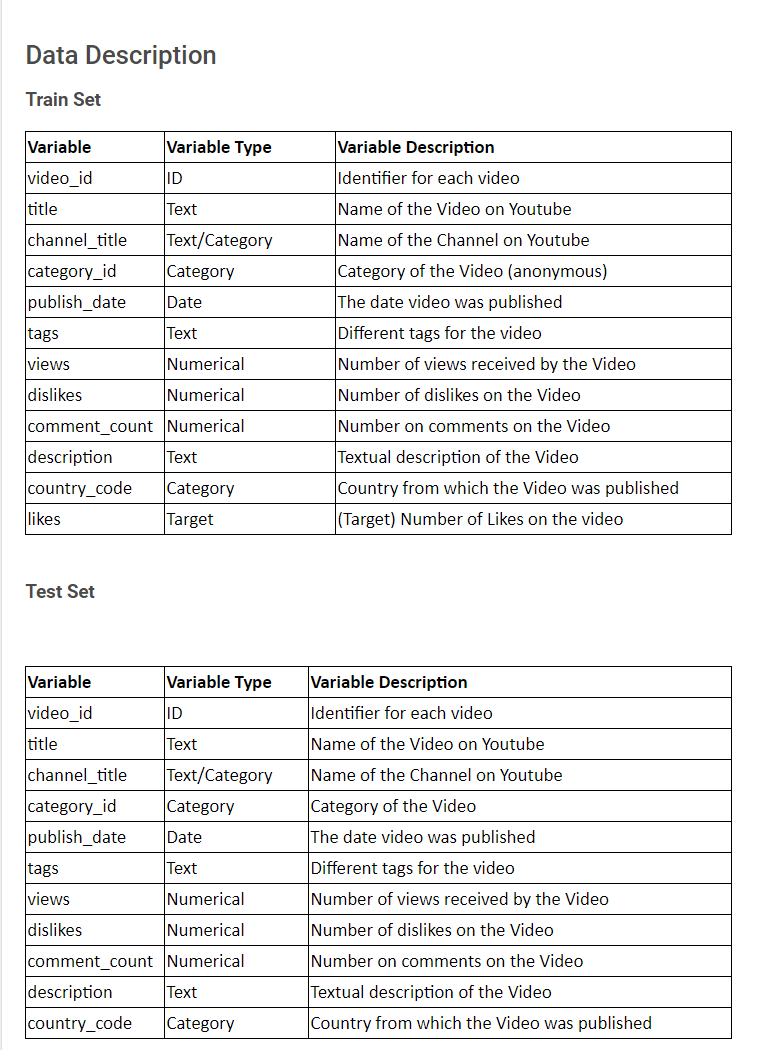

#### **Hypothesis Generation**
Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

* **Do videos with more views get more likes** ?
* **Do videos with more comments get more likes ?**
* **Do with videos with more dislikes get less likes ?**
* **Do longer videos get more likes than shorter videos ?**
* **Do descriptive videos get more number of likes ?**
* **Does a channel affect the number of likes?**
* **Does the country of origin affect the number of likes ?**
* **Do people post more videos on weekends than weekdays ?**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

# EDA

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.  

We have been provided three files. A description for what each of these files contain is given below:


1.     **SampleSubmission.csv**: This gives us a required format for submitting our solutions to the AV solution checker.
2.     **Train.csv**: We will use this file for training our model. It contains variables or features that we will input to our model, and the *target variable* that we want to predict.
3.     **Test.csv**: This will contain all variables in the training dataset except the *target variable*. We will use our trained model to predict the target for this dataset. 


In [ ]:
!unzip /content/test_mPTIhGU.zip

Archive:  /content/test_mPTIhGU.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


In [ ]:
!unzip /content/train_dPrl03o.zip

Archive:  /content/train_dPrl03o.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [ ]:
ss = pd.read_csv('sample_submission_cxCGjdN.csv')
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

#### **Sample Submission**

In [93]:
ss.head()

video_id        likes
0     87185   634.910670
1      9431  2359.554033
2     40599    60.416522
3       494  3974.778700
4     73942  1052.153150

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 

### **1. Brief look at the dataset**.

In [ ]:
train.head(3)

video_id  ...   likes
0     53364  ...  2351.0
1     51040  ...  3264.0
2      1856  ...   580.0

[3 rows x 12 columns]

In [ ]:
test.head(3)

video_id  ... country_code
0     87185  ...           IN
1      9431  ...           IN
2     40599  ...           CA

[3 rows x 11 columns]

In [ ]:
ID_COL, TARGET_COL = 'video_id', 'likes'

### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [ ]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 26061 samples and 12 variables

Test contains 11170 samples and 11 variables

The dataset contains 10 features


### **3.Target Distribution**

since regression problem we will be using density plot to check the target distibution

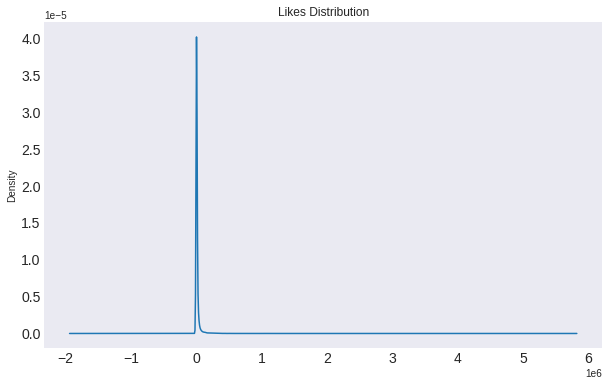

In [ ]:
train[TARGET_COL].plot(kind = 'density', title = 'Likes Distribution', fontsize=14, figsize=(10, 6))

**Question**

***Highly Right Skewed Data.***
<br>
What can we do to change this distribution and make it more normal ?

When your input value is so small, using np.log1p or np.expm1 to calculate, you will get the more accutrate result than np.log or np.exp

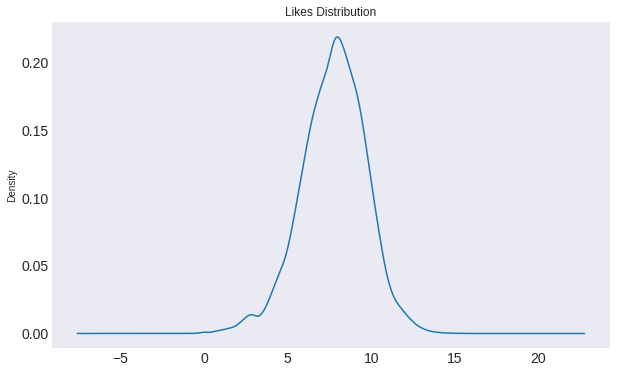

In [ ]:
np.log1p(train[TARGET_COL]).plot(kind = 'density', title = 'Likes Distribution', fontsize=14, figsize=(10, 6))

Let's the see the same for boxplot.

1. Without log-transformation.
2. With log-transformation.

**Original Target**

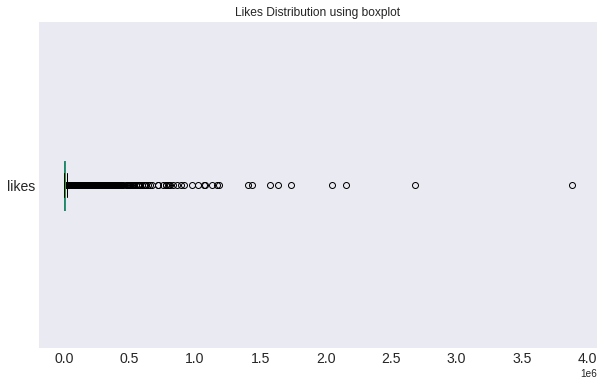

In [ ]:
train[TARGET_COL].plot(kind = 'box', title = 'Likes Distribution using boxplot',vert=False, fontsize=14, figsize=(10, 6))

**Log Transformed Target**

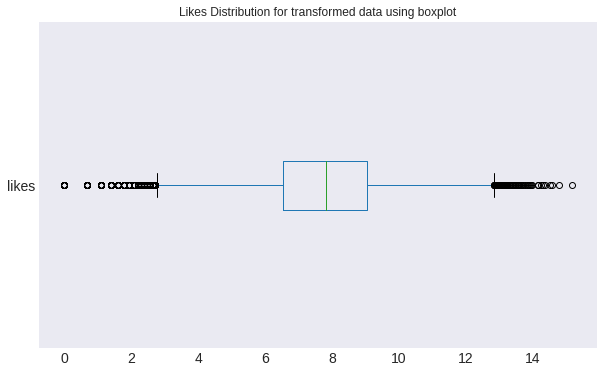

In [ ]:
np.log1p(train[TARGET_COL]).plot(kind = 'box', title = 'Likes Distribution for transformed data using boxplot',vert=False, fontsize=14, figsize=(10, 6))

###**4. Variable Datatypes**

In [ ]:
train.head(1)

video_id  ...   likes
0     53364  ...  2351.0

[1 rows x 12 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


### **5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
train.isnull().sum() /len(train)

video_id         0.0
title            0.0
channel_title    0.0
category_id      0.0
publish_date     0.0
tags             0.0
views            0.0
dislikes         0.0
comment_count    0.0
description      0.0
country_code     0.0
likes            0.0
dtype: float64

### **6. Unique values in each variable**

In [ ]:
train.nunique()

video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

## **Analyzing Each Variable & their relationships**

There are 4 types of features that we have:

1. Numerical
2. Categorical
3. Textual
4. DateTime


Also our target is Continuous

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'likes'

In [ ]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [ ]:
num_cols = [col for col in train.columns if train[col].dtypes !='O' and col not in ([ID_COL,TARGET_COL])]

In [ ]:
num_cols = ['views', 'dislikes', 'comment_count']

#### **Univariate Analyis**

Boxplot

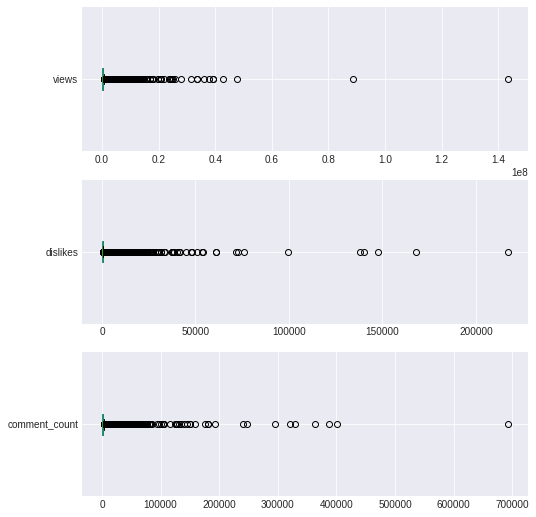

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 9))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

##### **Density Plots**

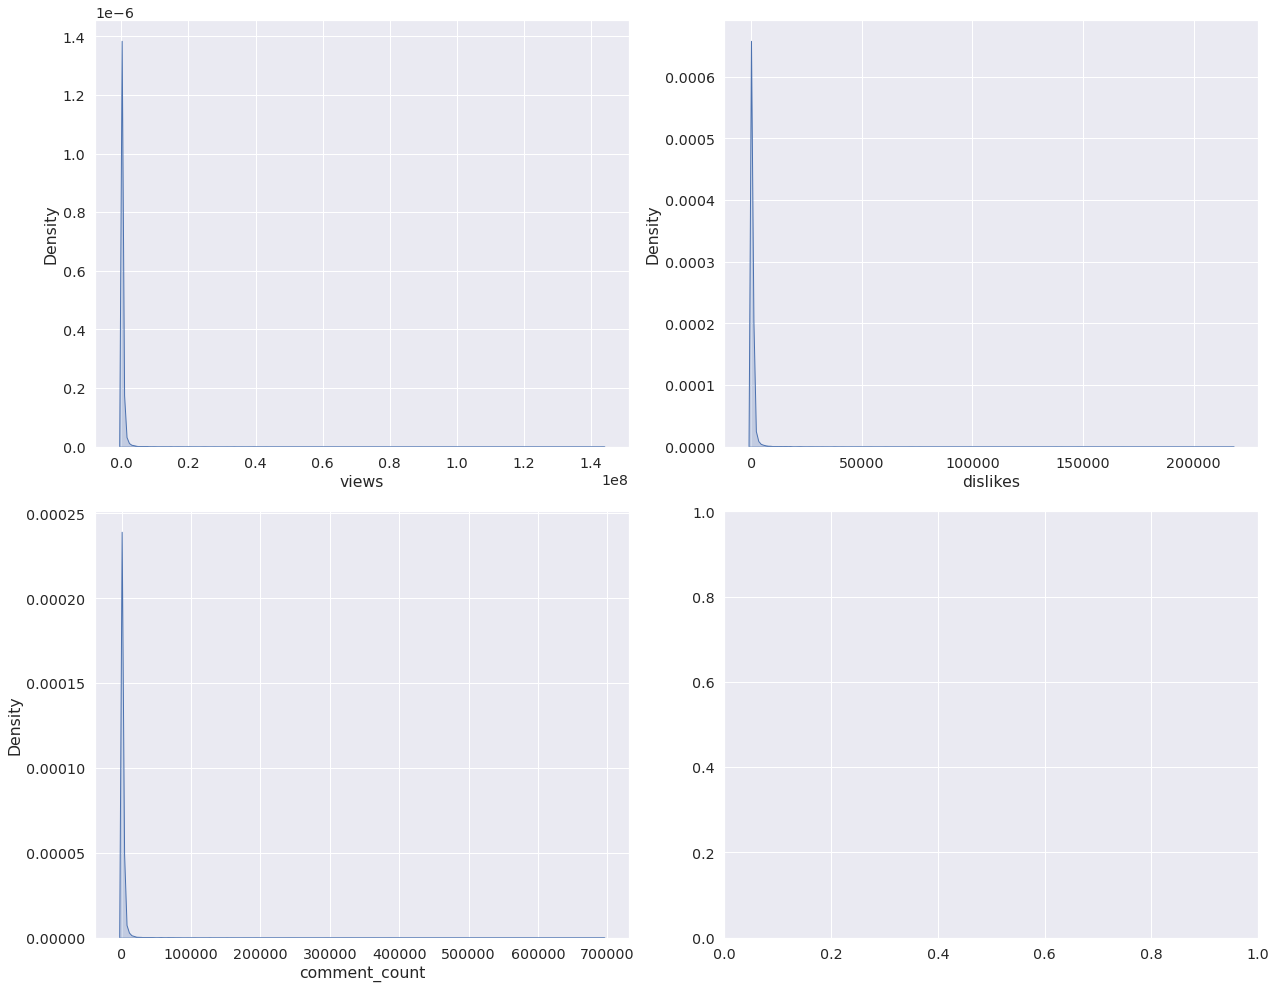

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

**Log Transformation of Numerical Columns**

In [ ]:
for c in num_cols + ['likes']:
  train[c] = np.log1p(train[c]) 

#### **Boxplot**

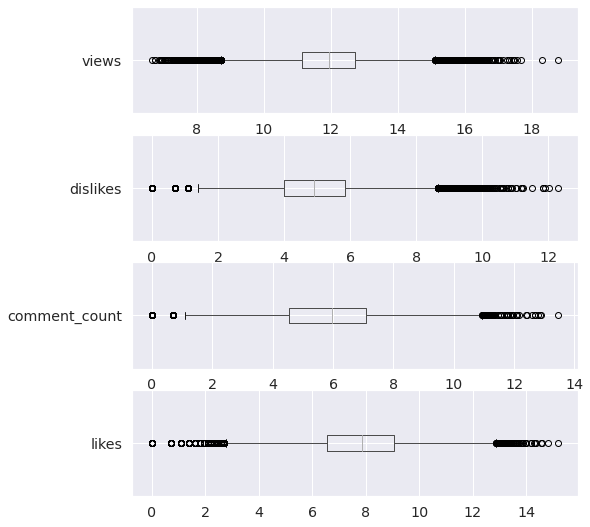

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_cols + ['likes']):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

**Density Plots**

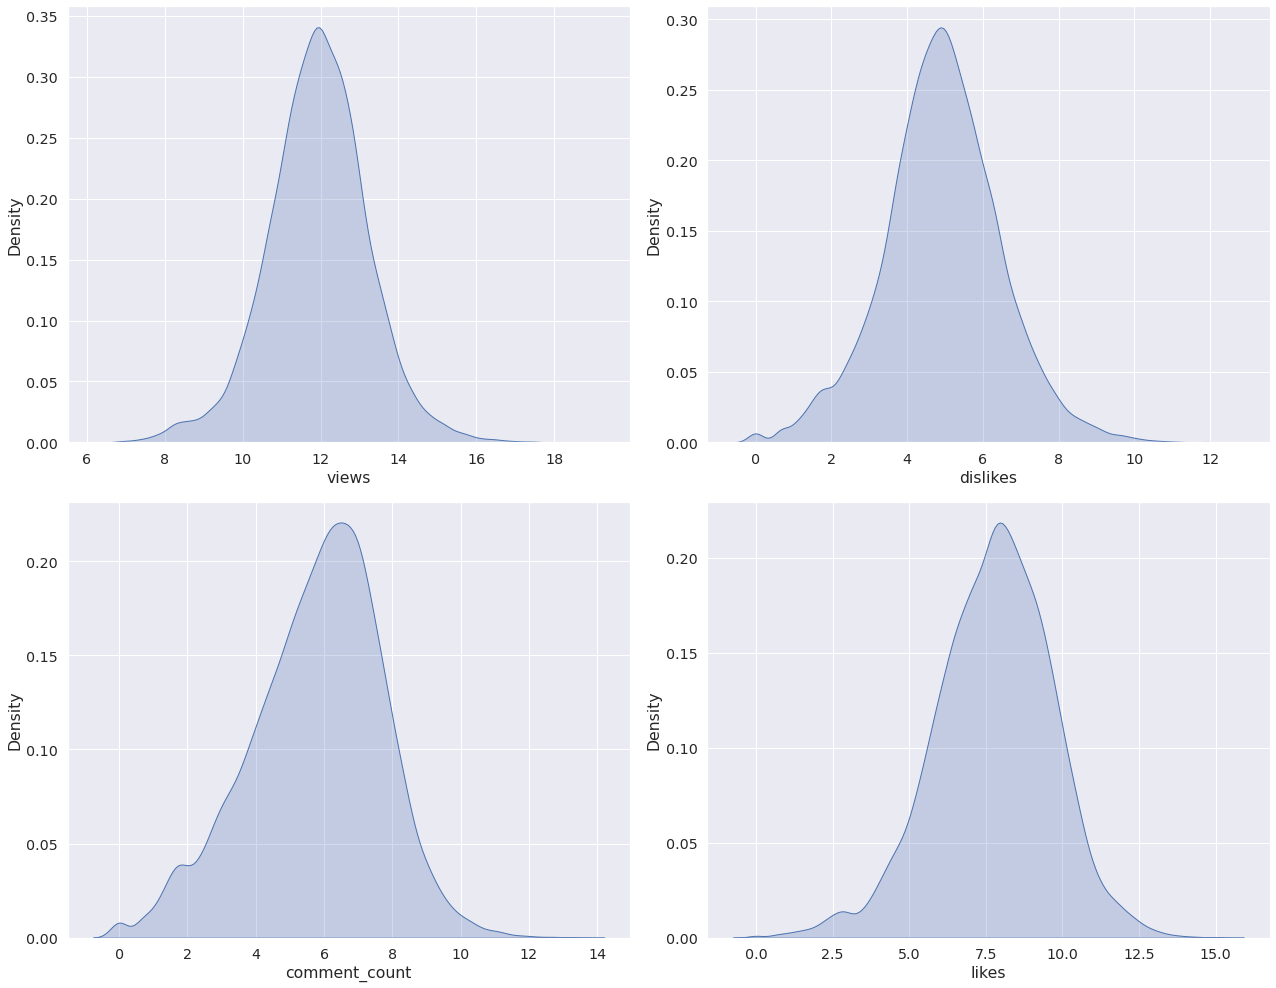

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols + ['likes']):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

#### **Bivariate Analysis**

##### **Correlation HeatMaps**

<Figure size 1008x576 with 0 Axes>

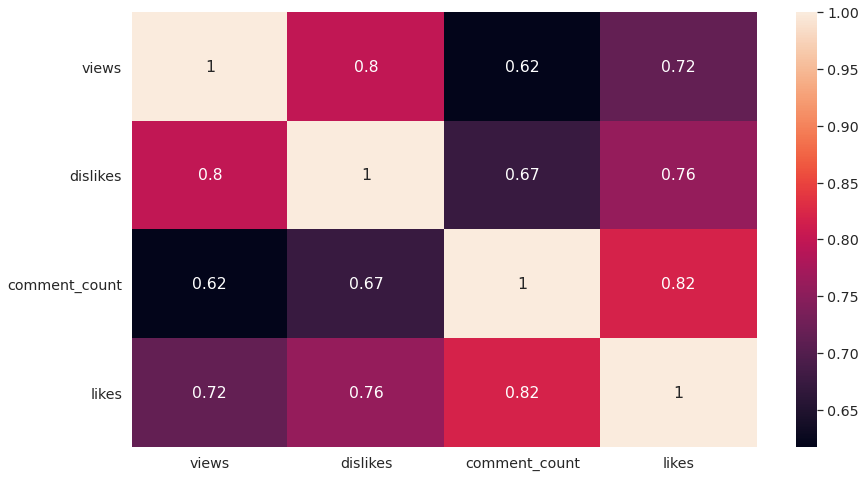

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(train[num_cols + ['likes']].corr(), annot=True)

##### **Pair Plots**

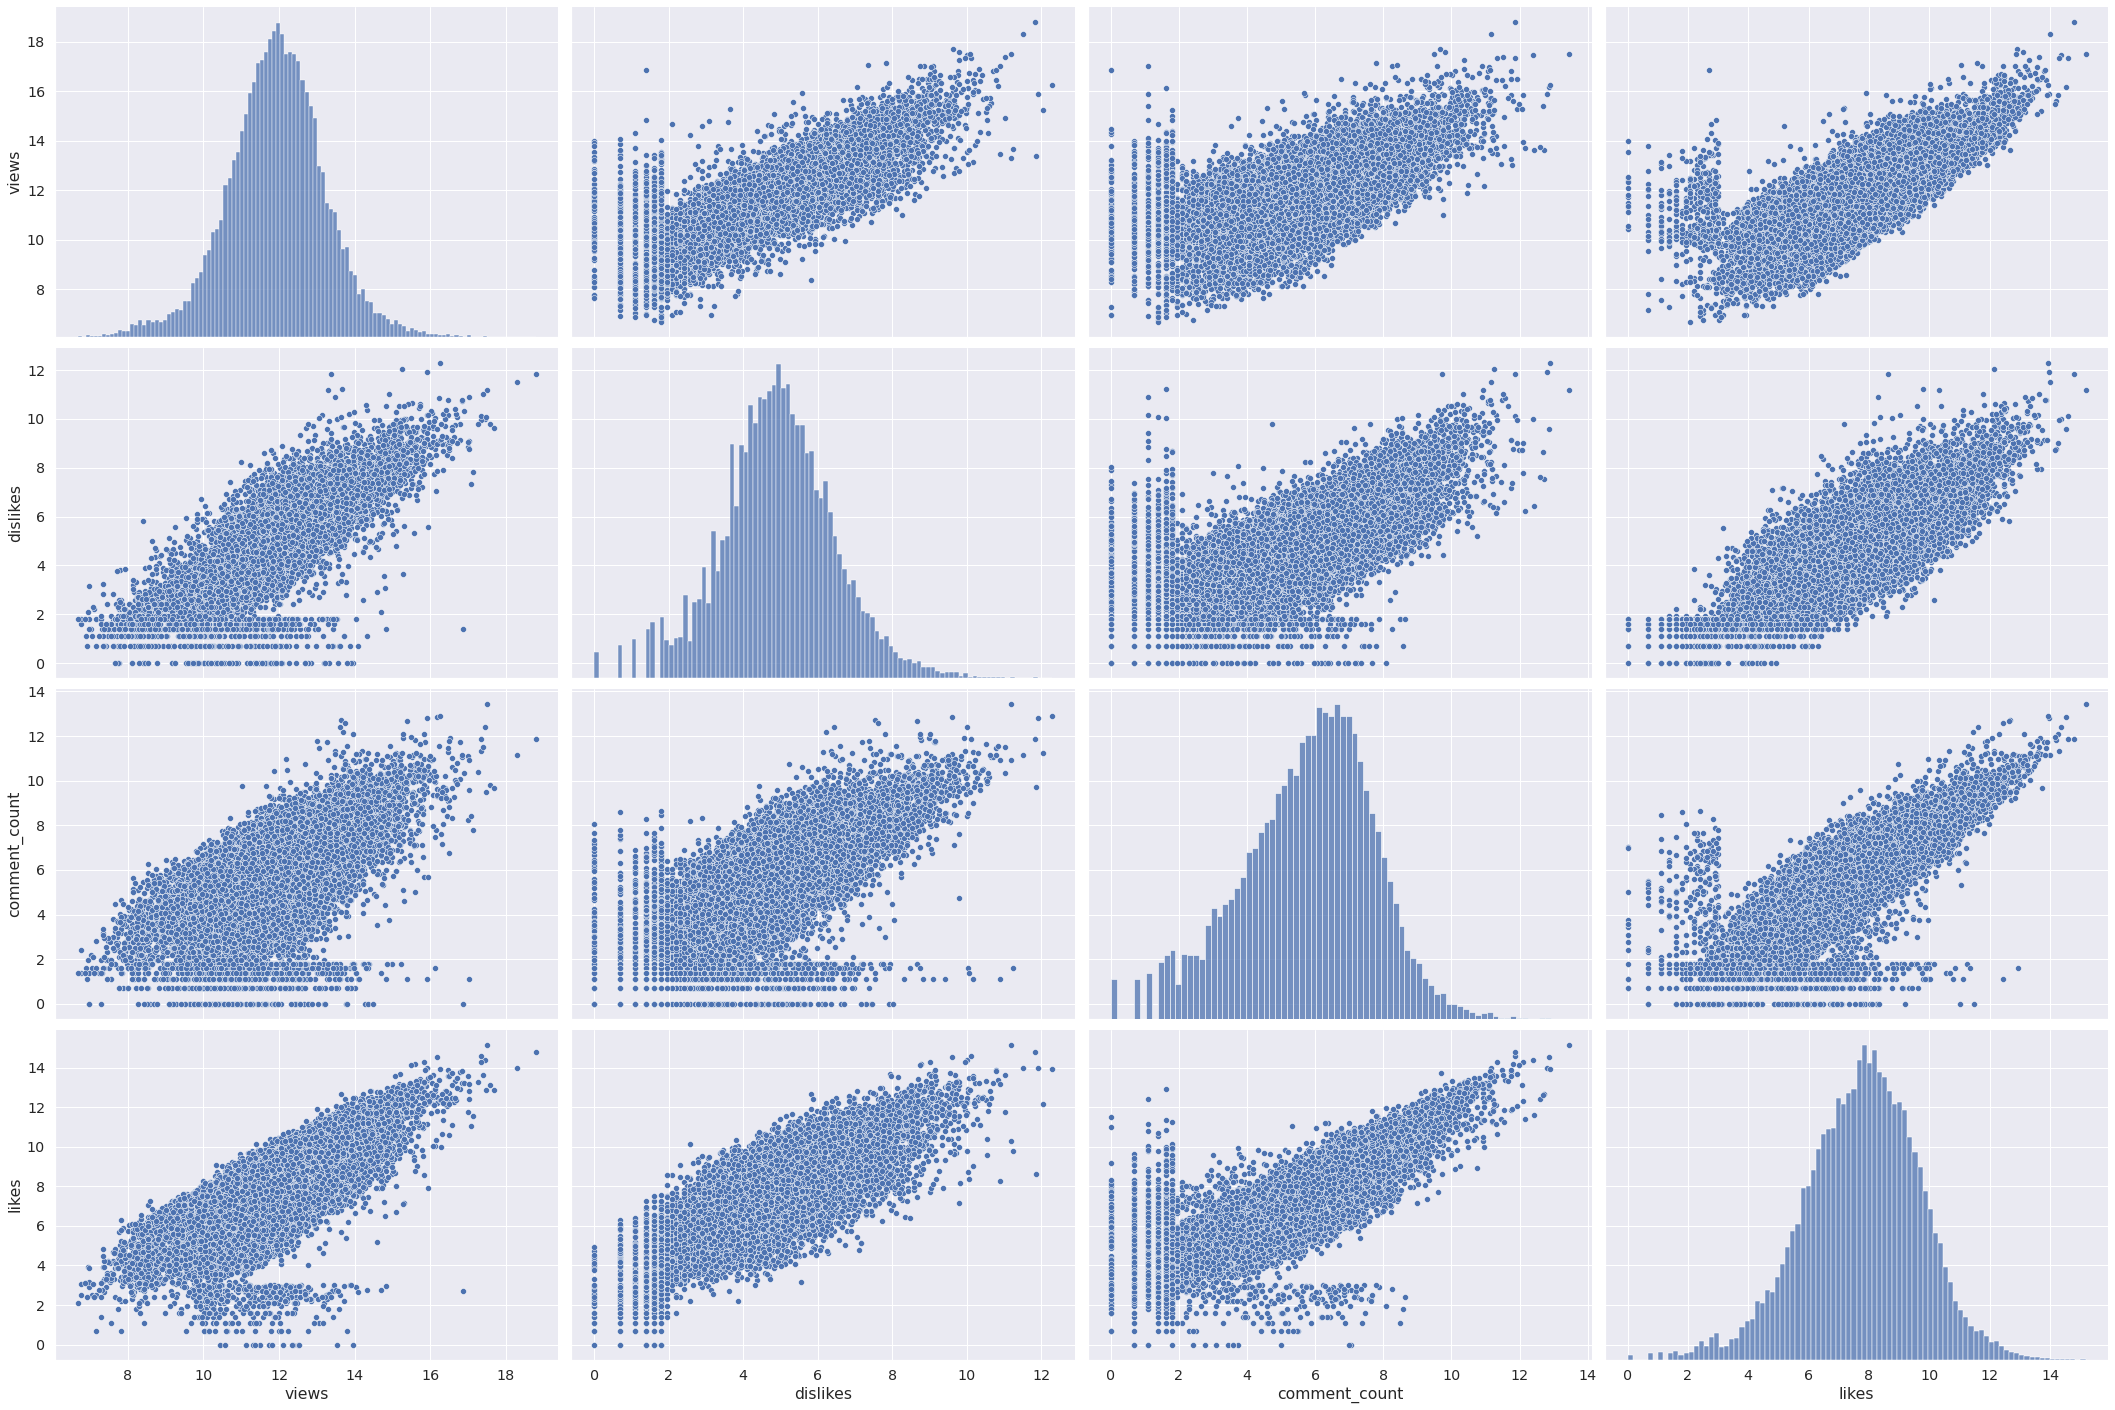

In [ ]:
sns.pairplot(train[num_cols + ['likes']], height=5, aspect=24/16)

**Answering Hypothesis**

* **Do videos with more views get more likes** ?

Yes they do, we have a high correlation of 0.72 also the plot between the two variables shows this.

* **Do videos with more comments get more likes** ?

Yes they do, we have a high correlation of 0.82 also the plot between the two variables shows this.

* **Do videos with more dislikes get less likes** ?

Any form of popularity is good popularity. As the number dislikes increases, number of views increases too, and so the number of likes.

* **Do longer videos get more likes than shorter videos ?**

We don't have data to answer this question. Should we try to collect more data ? What other features could be helpful ?


### **Categorical Variables**

#### **Univariate Analysis**

In [ ]:
train[cat_cols].nunique()

category_id        17
country_code        4
channel_title    5764
dtype: int64

##### **Pie Charts**

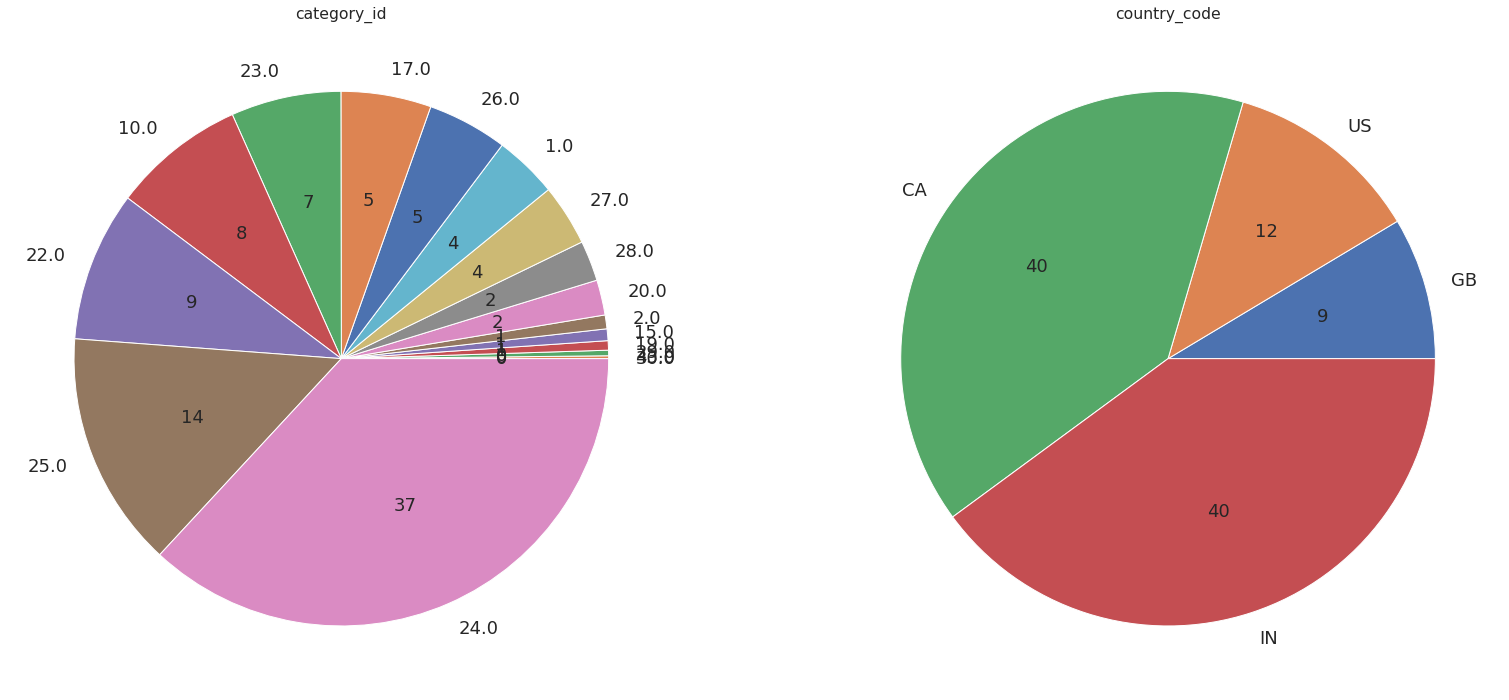

In [ ]:
cat_cols = ['category_id', 'country_code', 'channel_title']
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for i, c in enumerate(['category_id', 'country_code']):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

**Horizontal Bar Plots**

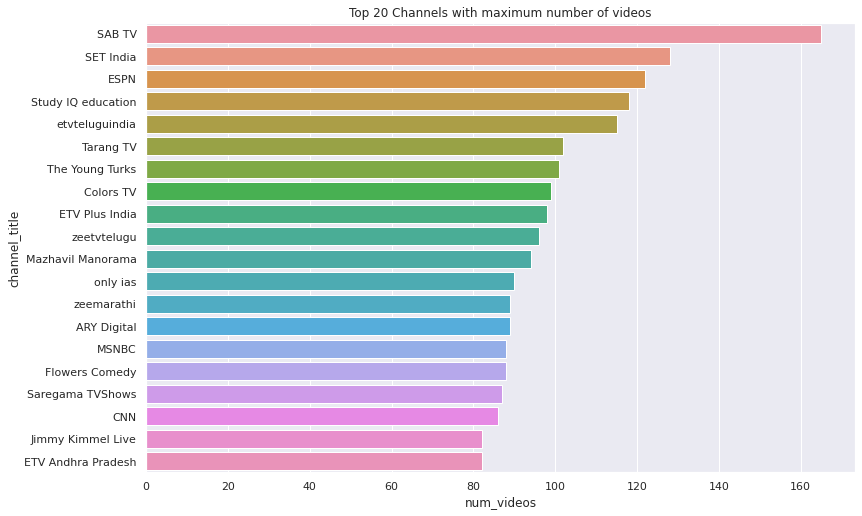

In [ ]:
sns.set(rc={'figure.figsize':(12.7, 8.27)})

top_20_channels = train['channel_title'].value_counts()[:20].reset_index()
top_20_channels.columns = ['channel_title', 'num_videos']

_ = sns.barplot(data = top_20_channels, y = 'channel_title', x = 'num_videos')
_ = plt.title("Top 20 Channels with maximum number of videos")

#### **Bivariate Analyis**

**Country Wise Number of Videos for Channel**

In [ ]:
country_wise_channels = train.groupby(['country_code', 'channel_title']).size().reset_index()
country_wise_channels.columns = ['country_code', 'channel_title', 'num_videos']
country_wise_channels = country_wise_channels.sort_values(by = 'num_videos', ascending=False)

In [ ]:
train['country_code'].unique()

array(['CA', 'IN', 'GB', 'US'], dtype=object)

In [ ]:
country_wise_channels

country_code       channel_title  num_videos
4937           IN  Study IQ education         118
5237           IN      etvteluguindia         115
5016           IN           Tarang TV         102
2220           CA     The Young Turks         100
4254           IN           Colors TV          99
...           ...                 ...         ...
2890           GB        All Time Low           1
2889           GB       Alissa Ashley           1
2888           GB               Ali-A           1
2886           GB              Alesso           1
6674           US                 郭韋辰           1

[6675 rows x 3 columns]

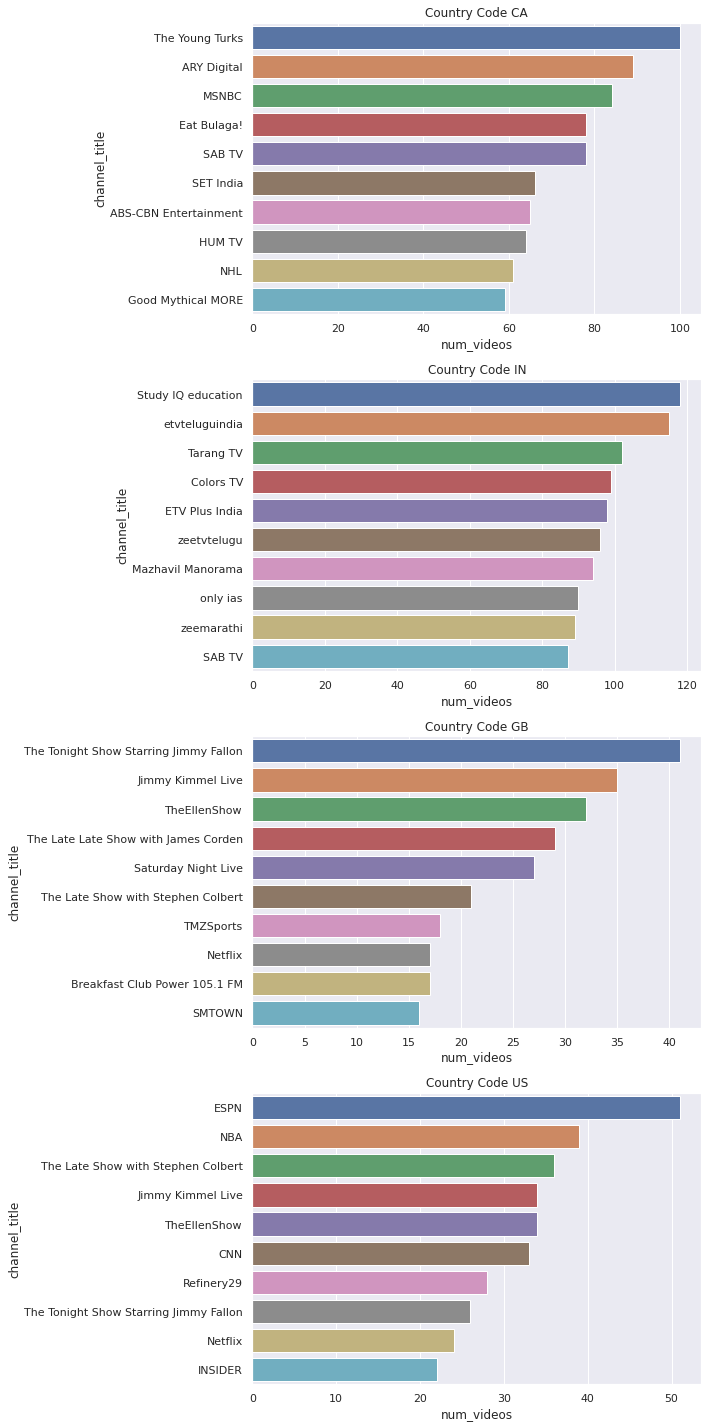

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'num_videos', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

#### **Multivariate Analysis**

Analyzing more than two variables at once

**Country Wise Likes for Channel**

What are the variables that we want to analyze here ?

In [ ]:
country_wise_channels = train.groupby(['country_code', 'channel_title'])['likes'].max().reset_index()
country_wise_channels = country_wise_channels.sort_values(by = ['likes'], ascending=False)

In [ ]:
country_wise_channels

country_code         channel_title      likes
3994           GB               ibighit  15.171369
3425           GB         LuisFonsiVEVO  14.803627
3106           GB             DrakeVEVO  14.581986
3465           GB  Marvel Entertainment  14.367048
3122           GB            Ed Sheeran  14.306619
...           ...                   ...        ...
4530           IN            Life Hacks   0.693147
1846           CA        ST Productions   0.693147
4734           IN          Pal Pal News   0.693147
6214           US          Rob Andretti   0.693147
2863           GB   5 Seconds of Summer   0.000000

[6675 rows x 3 columns]

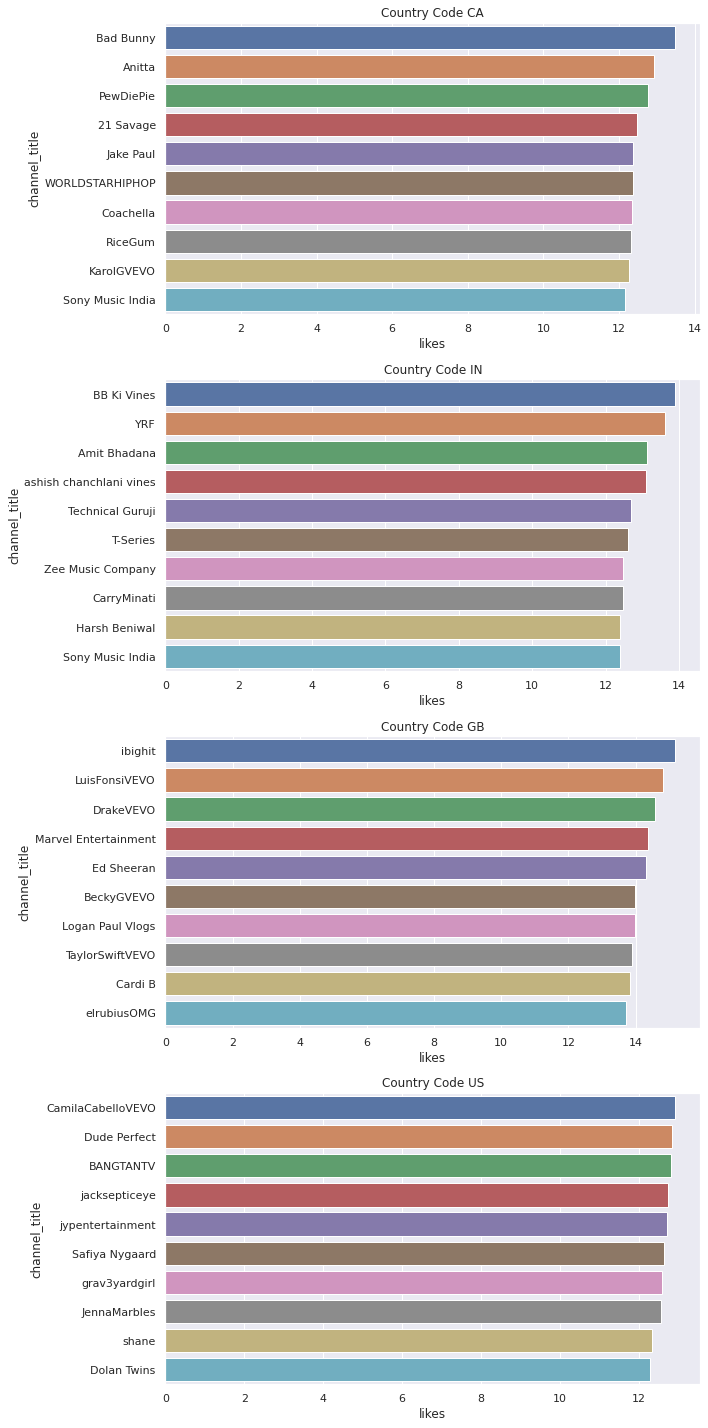

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'likes', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

**Question** 

* **Does a channel affect the number of likes?**

##### **CatPlots**

**Likes Distribution Per Category**

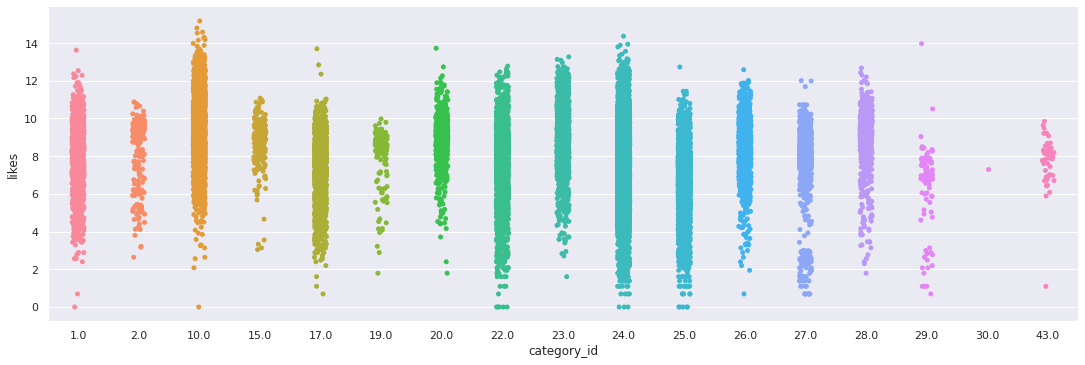

In [ ]:
sns.catplot(x="category_id", y="likes", data=train, height=5, aspect=24/8)

**Likes Distribution Per Country**

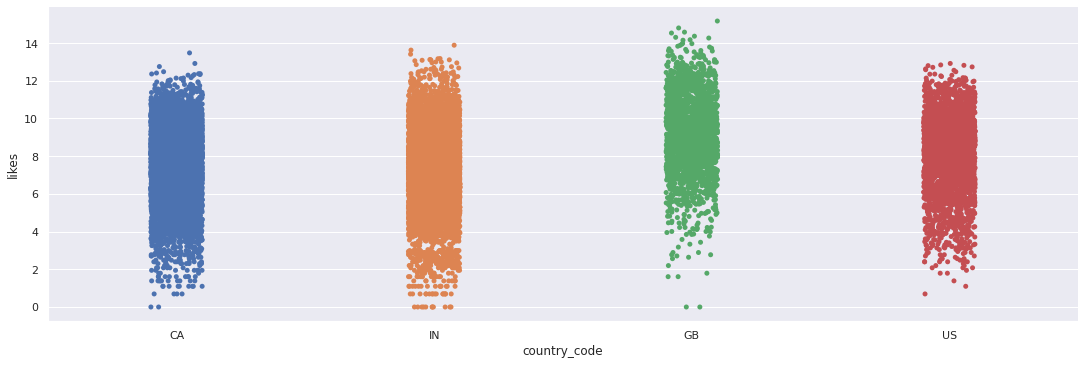

In [ ]:
sns.catplot(x="country_code", y="likes", data=train, height=5, aspect=24/8)

**Mean Likes Per Country**

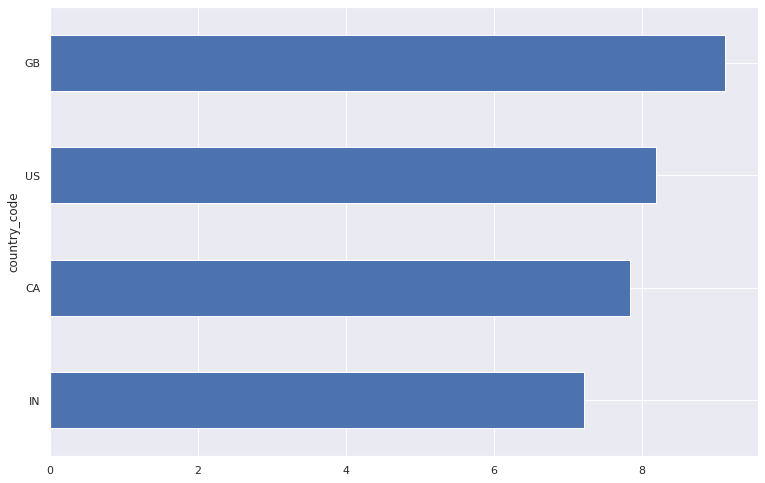

In [ ]:
train.groupby('country_code')['likes'].mean().sort_values().plot(kind='barh')

**Question** 

* **Does a country affect the number of likes?**

Looks like videos posted in England have an higher average number of likes compared to videos posted in India.

### **DateTime Variables**

In [ ]:
train['publish_date'] = pd.to_datetime(train['publish_date'], format='%Y-%m-%d')
test['publish_date'] = pd.to_datetime(test['publish_date'], format='%Y-%m-%d')
train['publish_date'].loc[:3]

0   2017-12-12
1   2018-03-08
2   2018-03-26
3   2018-02-21
Name: publish_date, dtype: datetime64[ns]

**Value Counts of Videos Year Wise**

**Mininum and Maximum Date**

In [ ]:
train['publish_date'].min(),train['publish_date'].max()

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [ ]:
train['publish_date'].dt.year.value_counts(normalize=True)

2018    0.722958
2017    0.273666
2015    0.000614
2016    0.000614
2011    0.000499
2014    0.000345
2013    0.000345
2009    0.000307
2012    0.000230
2010    0.000153
2008    0.000115
2007    0.000115
2006    0.000038
Name: publish_date, dtype: float64

**Number of Videos in Data datewise**

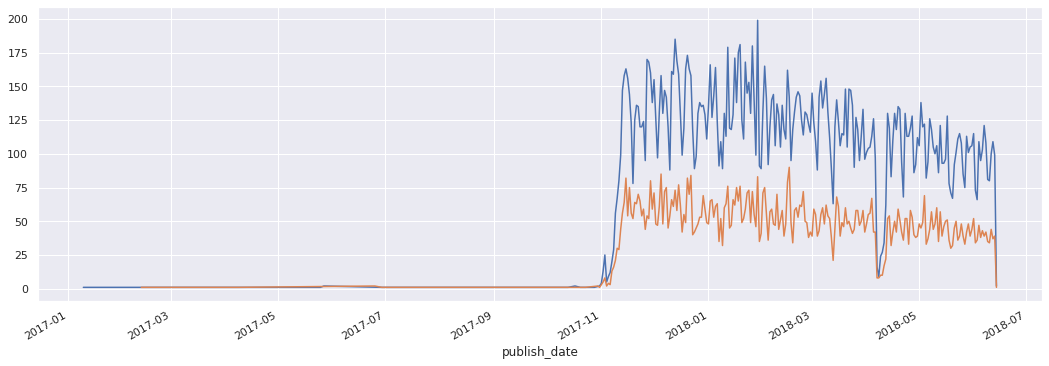

In [ ]:
latest_data_train = train[train['publish_date'] > '2017']
latest_data_test = test[test['publish_date'] > '2017']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))

In [ ]:
test.shape, train.shape

((11170, 11), (26061, 12))

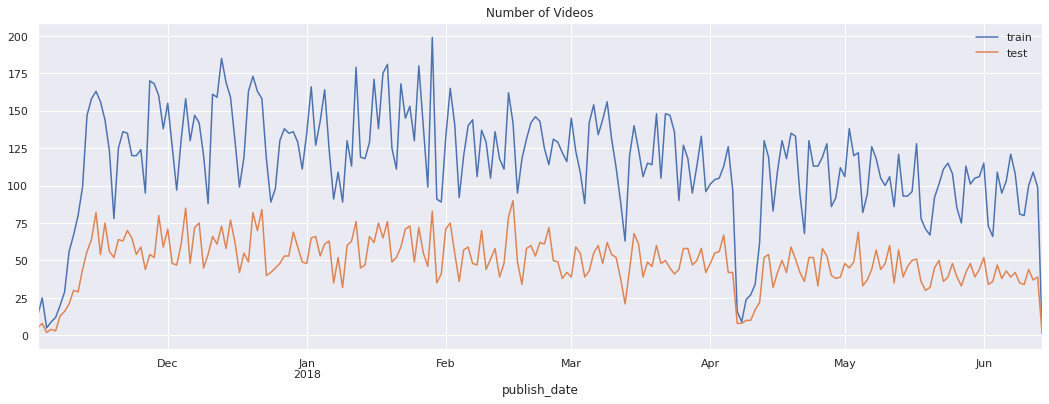

In [ ]:
latest_data_train = train[train['publish_date'] > '2017-11']
latest_data_test = test[test['publish_date'] > '2017-11']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18, 6), title = 'Number of Videos')
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18, 6), title = 'Number of Videos')
_ = plt.legend()

**Mean Likes in Data Sorted by Date**

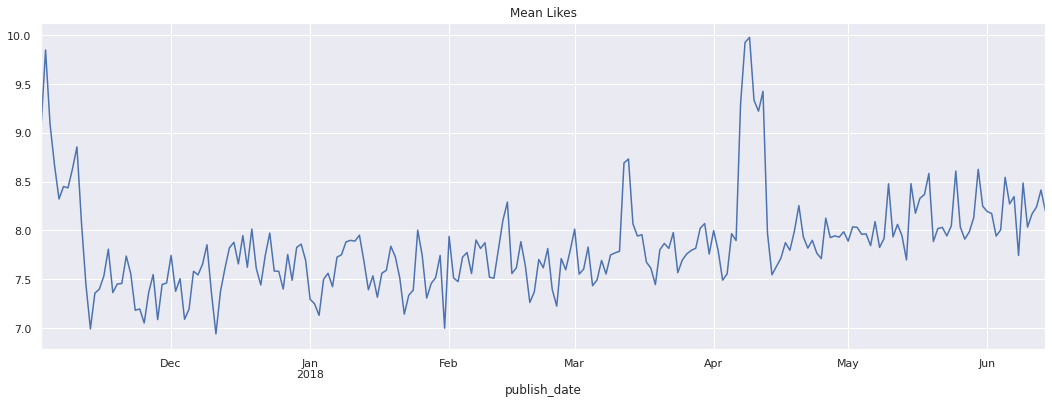

In [ ]:
latest_data = train[train['publish_date'] > '2017-11']
_ = latest_data.sort_values(by = 'publish_date').groupby('publish_date')['likes'].mean().plot(figsize=(18, 6), title="Mean Likes")

**Number of Videos by Country**

In [ ]:
tmp = latest_data.groupby(['publish_date', 'country_code']).size().reset_index()
tmp.pivot_table(index = 'publish_date', columns = 'country_code', values=0)

country_code    CA    GB    IN   US
publish_date                       
2017-11-02     1.0  11.0   NaN  1.0
2017-11-03     1.0  24.0   NaN  NaN
2017-11-04     NaN   5.0   NaN  NaN
2017-11-05     NaN   9.0   NaN  NaN
2017-11-06     NaN  11.0   NaN  1.0
...            ...   ...   ...  ...
2018-06-10    42.0   2.0  31.0  5.0
2018-06-11    46.0   4.0  45.0  5.0
2018-06-12    64.0   5.0  37.0  3.0
2018-06-13    51.0   7.0  39.0  2.0
2018-06-14     2.0   NaN   NaN  NaN

[225 rows x 4 columns]

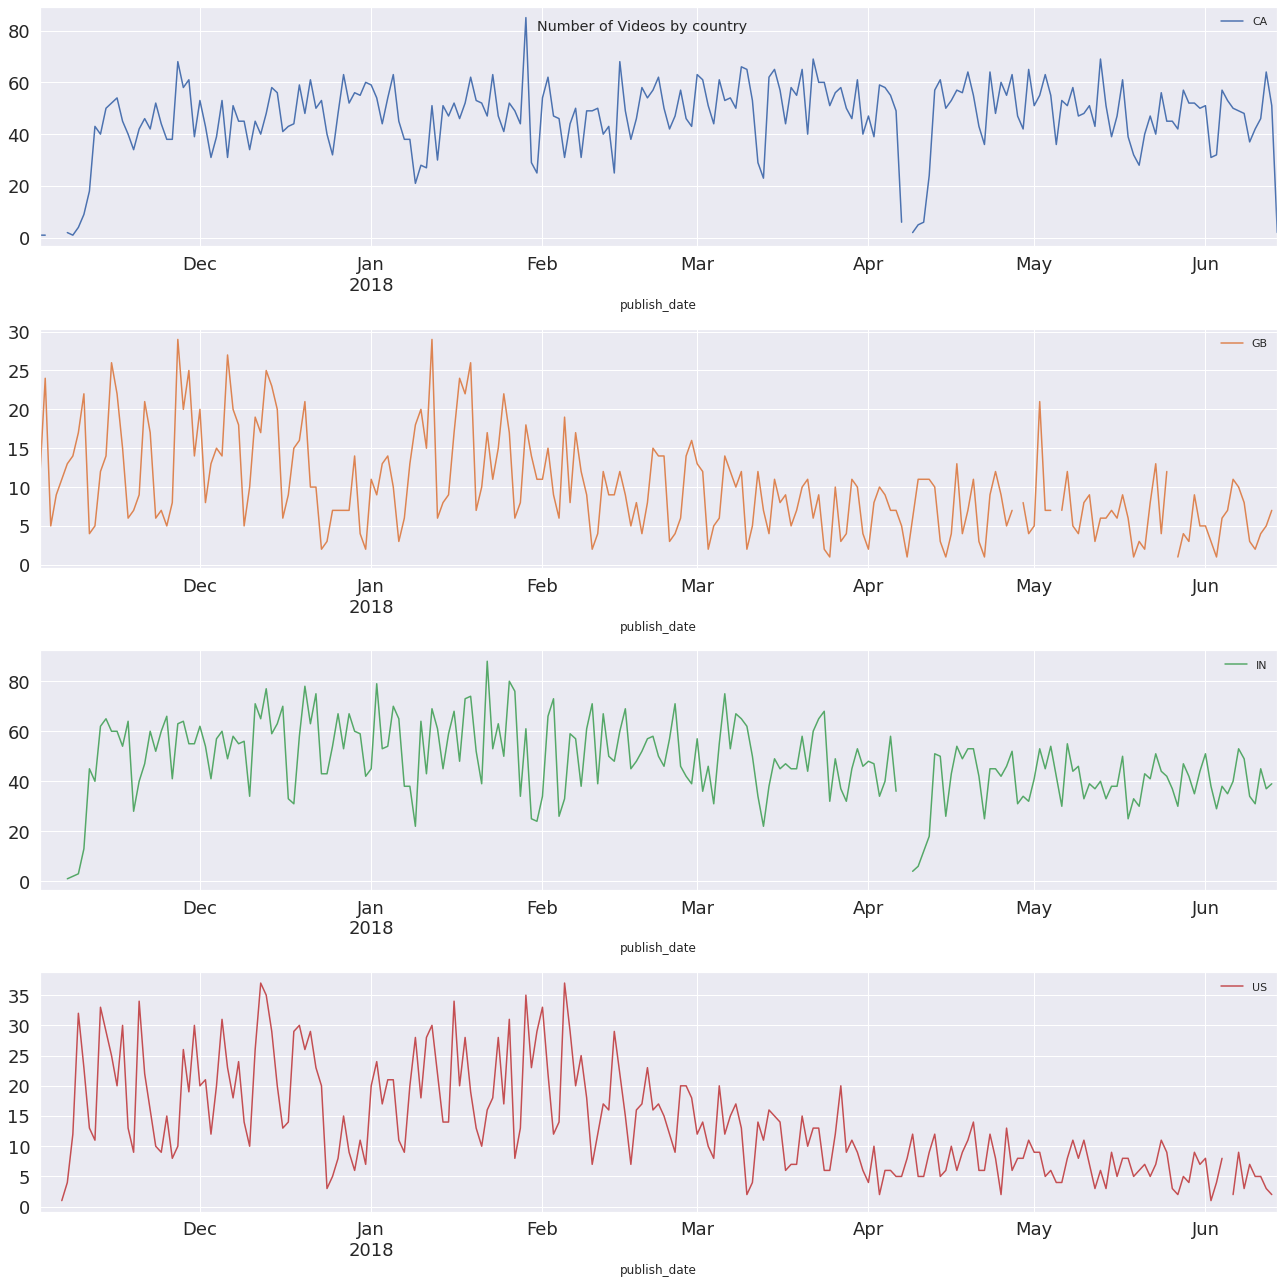

In [ ]:
tmp = latest_data.groupby(['publish_date', 'country_code']).size().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values=0).plot(subplots=True, figsize=(18, 18),
                                                                                           title='Number of Videos by country',
                                                                                           sharex=False,
                                                                                           fontsize=18)
plt.tight_layout()

**Why could be the reason for drop in Number of Videos for GB and USA ?**

**Mean Number of Likes by Country sorted by Date**

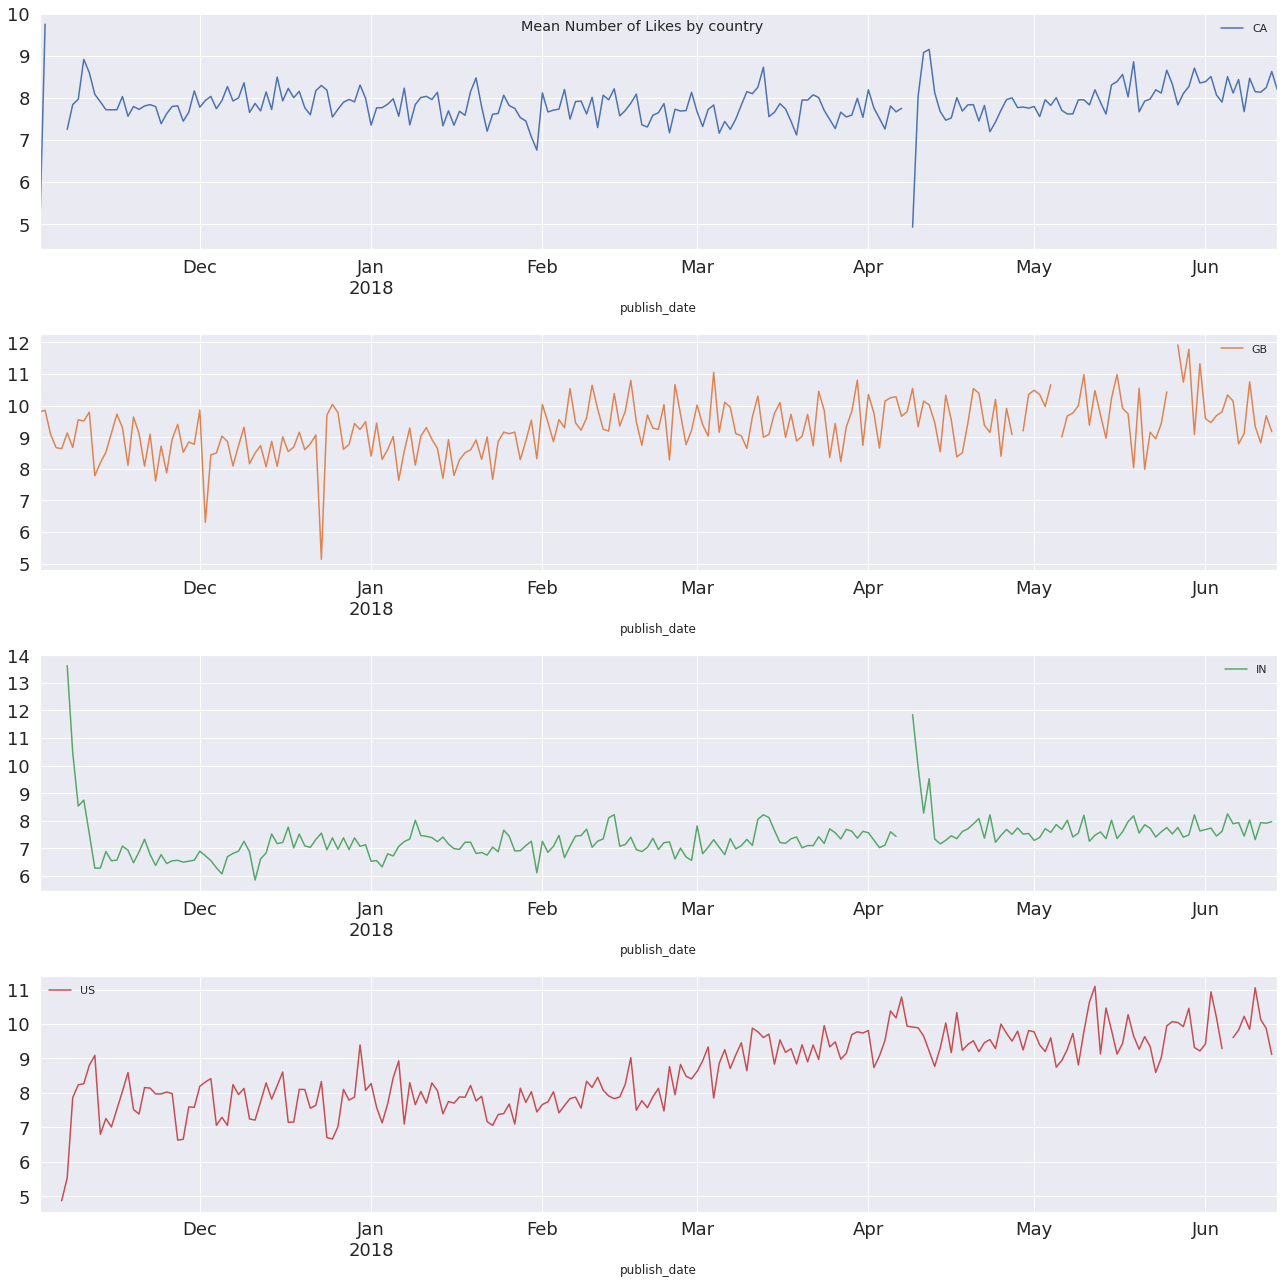

In [ ]:
tmp = latest_data.groupby(['publish_date', 'country_code'])['likes'].mean().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values='likes').plot(subplots=True, figsize=(18, 18),
                                                                                           title='Mean Number of Likes by country',
                                                                                           sharex=False,
                                                                                           fontsize=18)
plt.tight_layout()

**Do people post more videos on weekends than weekdays ?**

In [ ]:
train['dayofweek'] = train['publish_date'].dt.dayofweek

In [ ]:
train['dayofweek'].value_counts().sort_index()

0    3824
1    3876
2    3874
3    4045
4    4206
5    3330
6    2906
Name: dayofweek, dtype: int64

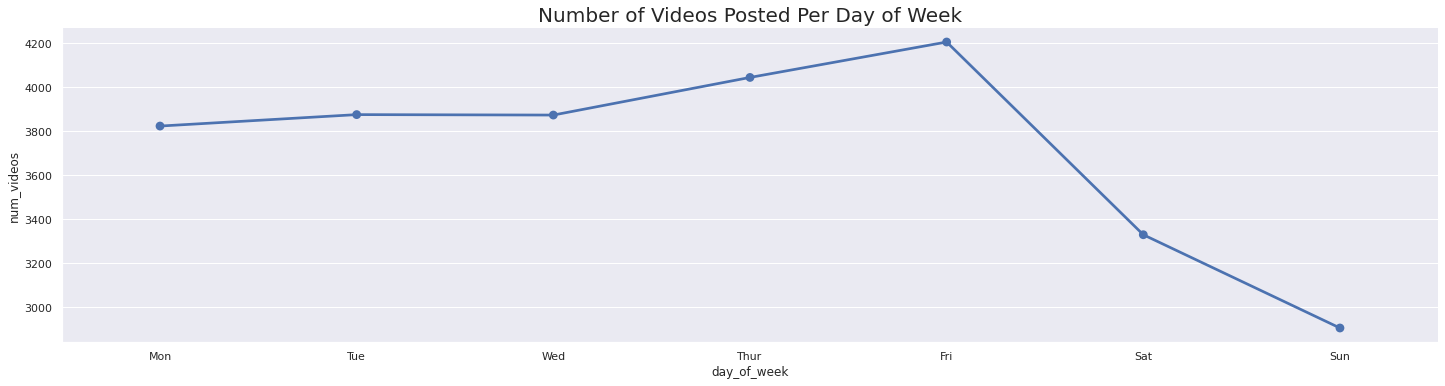

In [ ]:
n_videos_per_day_of_week = train['dayofweek'].value_counts().sort_index().reset_index()
n_videos_per_day_of_week.columns = ['day_of_week', 'num_videos']
n_videos_per_day_of_week['day_of_week'] = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_ = sns.catplot(x = 'day_of_week', y = 'num_videos', data = n_videos_per_day_of_week, kind = 'point',aspect = 24/6)
_ = plt.title("Number of Videos Posted Per Day of Week", fontsize=20)

It looks our hypothesis is incorrect in context of the current data. Most of the videos were published on Friday, but Saturday and Sunday saw the least number of videos published

### **Analyzing Textual Data using wordcloud**

In [ ]:
text_cols = ['title', 'tags', 'description']

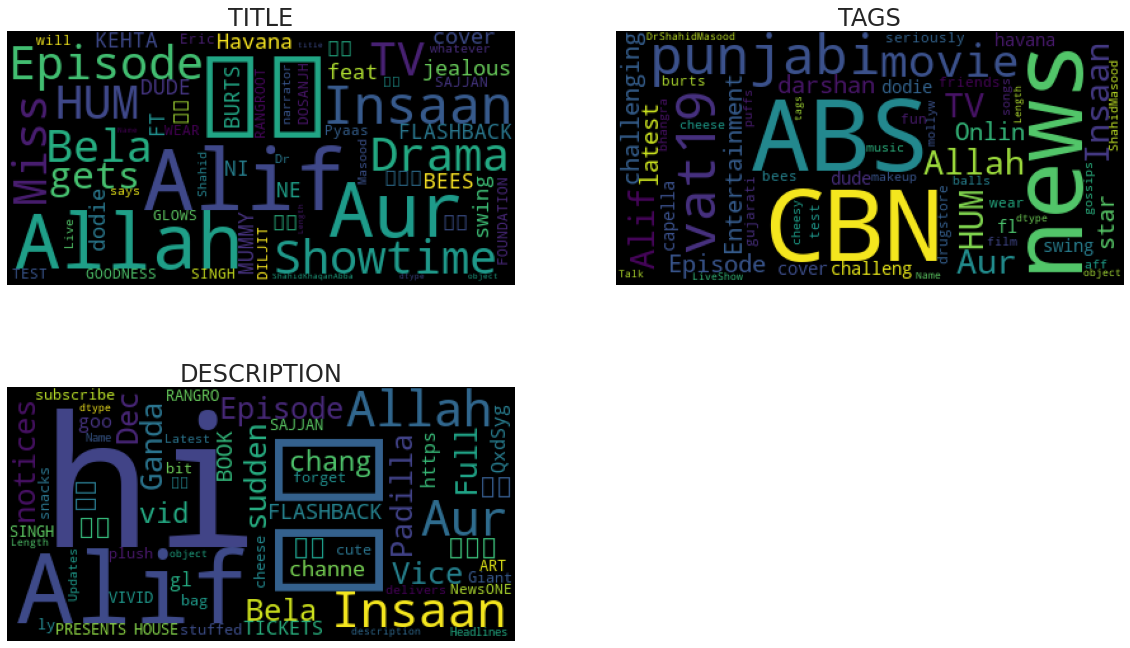

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(train[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [ ]:
train['likes'].describe()

count    26061.000000
mean         7.739954
std          1.927899
min          0.000000
25%          6.527958
50%          7.840706
75%          9.054154
max         15.171369
Name: likes, dtype: float64

consider top 10 % of the sample

In [ ]:
100 * ((train['likes'] > 10).sum()/train.shape[0])

10.694140669966616

In [ ]:
def plot_countrywise(country_code = 'IN'):
  country = train[train['country_code'] == country_code]
  country = country[country['likes'] > 10]
  fig, axes = plt.subplots(2, 2, figsize=(20, 12))
  axes = [ax for axes_row in axes for ax in axes_row]

  for i, c in enumerate(text_cols):
    op = wc.generate(str(country[c]))
    _ = axes[i].imshow(op)
    _ = axes[i].set_title(c.upper(), fontsize=24)
    _ = axes[i].axis('off')

  fig.delaxes(axes[3])
  _ = plt.suptitle(f"Country Code: '{country_code}'", fontsize=30)

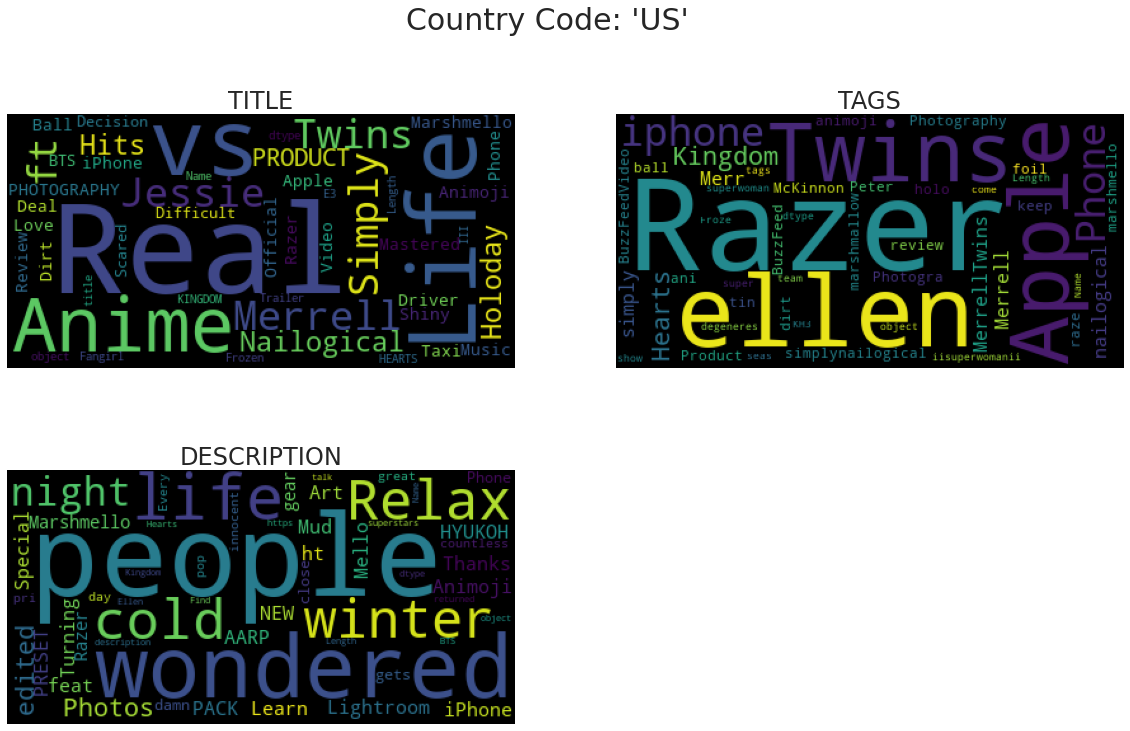

In [ ]:
plot_countrywise("US")

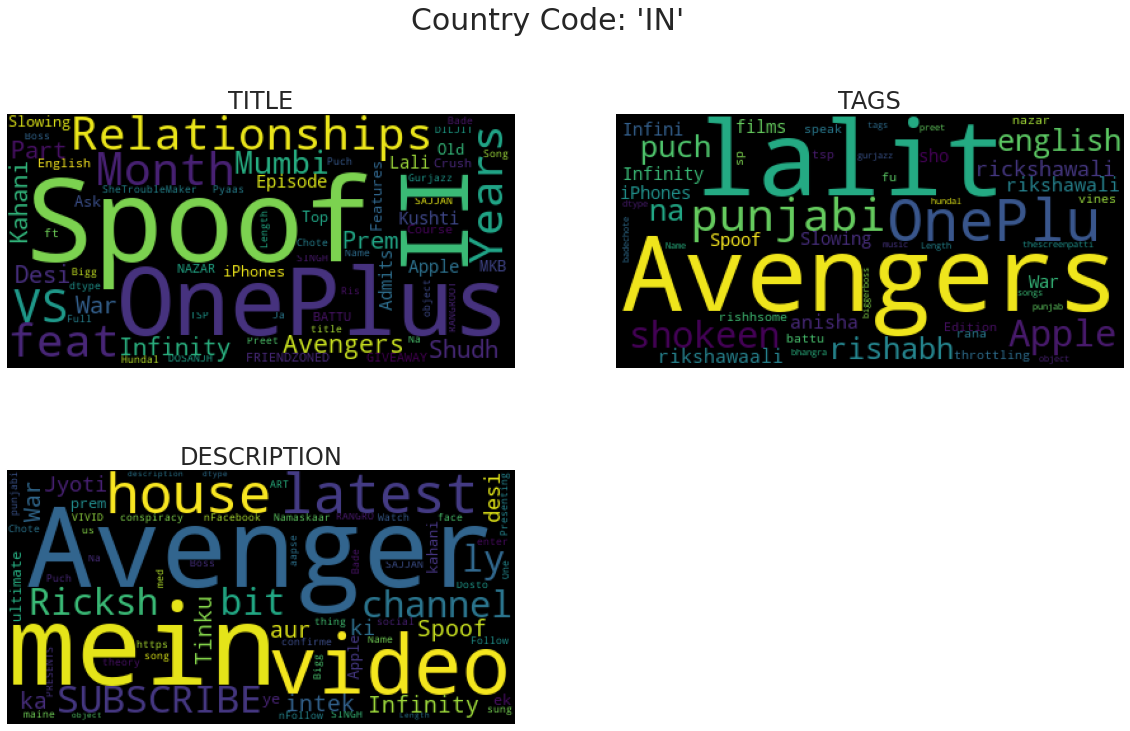

In [ ]:
plot_countrywise()

**Exercise**

Analyze **Canadian** Videos

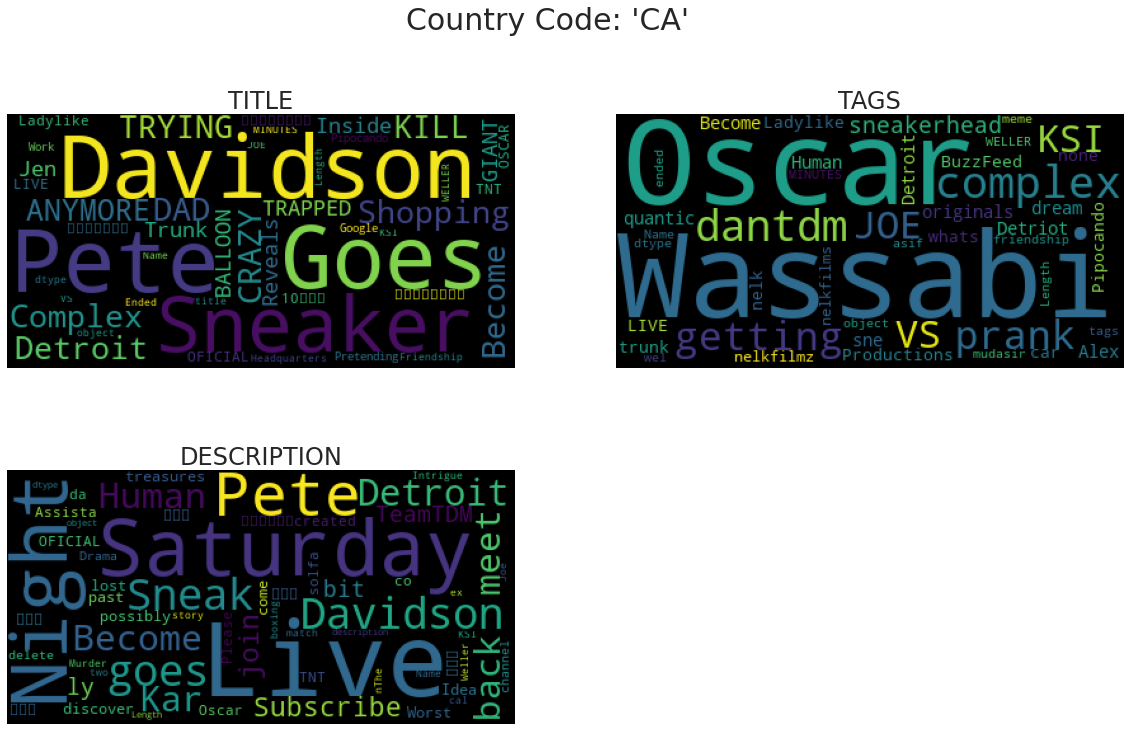

In [ ]:
plot_countrywise("CA")

**Do descriptive videos get more number of likes ?**

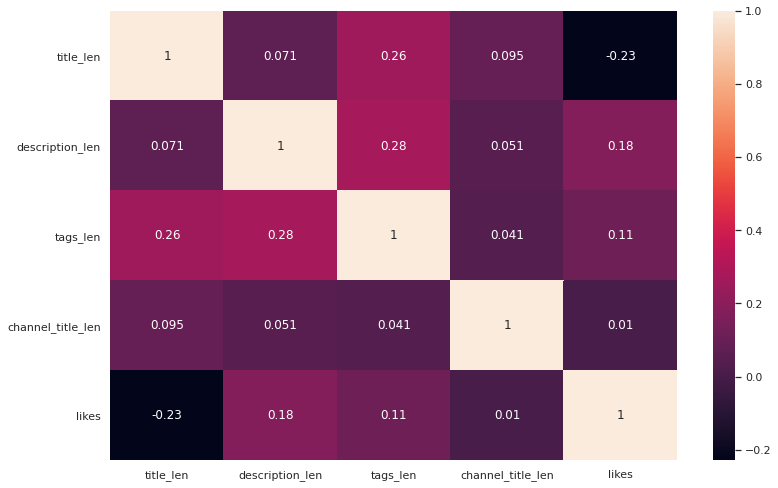

In [ ]:
train['title_len'] = train['title'].apply(lambda x: len(x))
train['description_len'] = train['description'].apply(lambda x: len(x))
train['tags_len'] = train['tags'].apply(lambda x: len(x))
train['channel_title_len'] = train['channel_title'].apply(lambda x: len(x))

_  = sns.heatmap(train[['title_len', 'description_len', 'tags_len', 'channel_title_len', 'likes']].corr(), annot = True)

So if you keep your title length short and description long, you are having higher chances of getting likes.

# **Baseline Model(s)**

## **METRIC**

**RMSLE(Root Mean Squared Log Error)**

Simply put RMSLE is the Root Mean Squared Error of the logarithm of actual and predicted values.

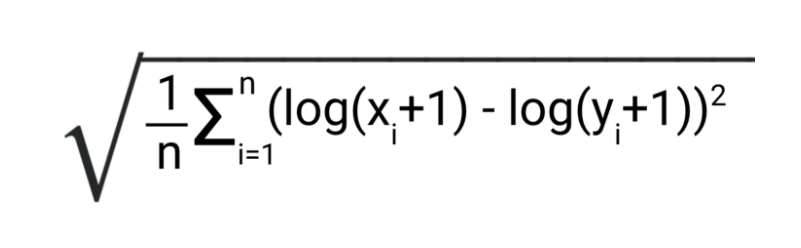

The Robustness of RMSLE to the outliers, the property of calculating the relative error between the Predicted and Actual Values, the most unique property of the RMLSE that it penalizes the underestimation of the actual value more severely than it does for the Overestimation.

**Read More about RMSLE here**

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-

**Helper Function to Download Test Predictions as CSV**

In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train[num_cols + ['likes']] = train[num_cols + ['likes']].apply(lambda x: np.log1p(x))
test[num_cols] = test[num_cols].apply(lambda x: np.log1p(x))

## **Model A. simplest model we can think (Predicting all instances as mean)**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

target = train[TARGET_COL]

In [ ]:
preds_target = pd.Series([target.mean()] * len(train))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1927.8618309979083


In [ ]:
np.log1p(10)

2.3978952727983707

In [ ]:
np.expm1(2.3978952727983707)

10.000000000000002

In [ ]:
preds_test = pd.Series([target.mean()] * len(test))
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_mean_preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv('hacklive2_mean_preds.csv').head()

video_id       likes
0     87185  2297.36779
1      9431  2297.36779
2     40599  2297.36779
3       494  2297.36779
4     73942  2297.36779

## **Model B. (Predicting all instances as median)**

In [ ]:
preds_target = pd.Series([target.median()] * len(train))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1930.4927341163989


In [ ]:
preds_test = pd.Series([target.median()] * len(test))
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_median_preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv("hacklive2_median_preds.csv").head()

video_id   likes
0     87185  2541.0
1      9431  2541.0
2     40599  2541.0
3       494  2541.0
4     73942  2541.0

## **Model C. (Predicting using number of views)**

1 has been added to avoid divide by zero error

In [ ]:
likes_per_view = ((train['likes'] + 1)/(train['views'] + 1))
likes_per_view.mean()

0.6723608458619709

In [ ]:
preds_target = train['views'] * 0.677

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1473.9157749667168


In [ ]:
preds_test = test['views'] * 0.672
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_preds_using_views.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv('hacklive2_preds_using_views.csv').head()

video_id        likes
0     87185  1983.992005
1      9431  3011.668763
2     40599   366.210328
3       494  2127.936090
4     73942  1504.223504

## **Model D. (Predicting using number of comments)**

In [ ]:
likes_per_comment = (train['likes'] + 1)/(train['comment_count'] + 1)
likes_per_comment.mean()

1.370729312306306

In [ ]:
preds_target = train['comment_count'] * 1.37

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1549.204914717152


In [ ]:
preds_test = test['comment_count'] * 1.37
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_preds_using_num_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv("hacklive2_preds_using_num_comments.csv").head()

video_id        likes
0     87185   403.793269
1      9431  2611.111997
2     40599    16.267652
3       494  2761.359541
4     73942   991.895146

## **Model E. (Predicting using Dislikes)**

In [ ]:
likes_per_dislike = (train['likes'] + 1)/(train['dislikes']+1)
likes_per_dislike.mean()

1.523152073084116

In [ ]:
preds_target = train['dislikes'] * 1.52

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1550.5421251222745


In [ ]:
preds_test = test['dislikes'] * 1.52
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_preds_using_dislikes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv('hacklive2_preds_using_dislikes.csv').head()

video_id        likes
0     87185   440.927765
1      9431  3913.625398
2     40599    37.275148
3       494  1948.020202
4     73942  7618.074155

# Advance Machine Learning Model

In [5]:
pip install catboost

     |████████████████████████████████| 66.1MB 56kB/s 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, ElasticNet

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [8]:
!unzip "/content/train_dPrl03o.zip"

Archive:  /content/train_dPrl03o.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [2]:
!unzip "/content/test_mPTIhGU.zip"

Archive:  /content/test_mPTIhGU.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


In [9]:
ss = pd.read_csv('sample_submission_cxCGjdN.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Helper Function to download files**

In [10]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [16]:
ID_COL, TARGET_COL = 'video_id', 'likes'

num_cols = ['views', 'dislikes', 'comment_count']
cat_cols = ['category_id', 'country_code']
text_cols = ['title', 'channel_title', 'tags', 'description']
date_cols = ['publish_date']

**Steps to Make a Baseline Regression Model**

1. Concatenate/Join the train and test Datasets. All kinds of processing must be performed on both train and test datasets together.

2. Convert all Categorical Variables to numbers. We will be use OneHot Encoding for this. 

3. Fill Null Values. This can be followed by other data processing and feature engineering steps, but we will go into it later.

4. Split the dataset back into train and test datasets.

5. Split the train set into train and validation sets.

6. Fit a regression Model on train, check its results on validation set.

7. Predict for the test set.

8.  Save the submission as a csv file and submit the model on AV.

**1. Concating/Joining train and test datasets.**

In [11]:
train.shape,test.shape

((26061, 12), (11170, 11))

In [12]:
df = pd.concat([train, test], axis=0).reset_index(drop = True)
df.shape

(37231, 12)

In [13]:
df.head(3)

video_id  ...   likes
0     53364  ...  2351.0
1     51040  ...  3264.0
2      1856  ...   580.0

[3 rows x 12 columns]

In [14]:
df.tail(3)

video_id  ... likes
37228     80293  ...   NaN
37229     80880  ...   NaN
37230      6514  ...   NaN

[3 rows x 12 columns]

**2. Encoding categorical columns.**

There are multiple ways to encoded categorical variables. For the sake of simplicity, we will be using One-Hot Encoding.

In [15]:
pd.get_dummies(pd.Series(['A', 'O', 'M']))

A  M  O
0  1  0  0
1  0  0  1
2  0  1  0

In [41]:
df = pd.get_dummies(df, columns = cat_cols)

**3. Filling Null Values**

As seen earlier in our EDA, our dataset contains null values. There could be multiple ways to fill our Null Values, but for now we will fill it with a large negative random number say -999

In [42]:
df.isnull().sum()

video_id                0
title                   0
channel_title           0
publish_date            0
tags                    0
views                   0
dislikes                0
comment_count           0
description             0
likes               11170
category_id_1.0         0
category_id_2.0         0
category_id_10.0        0
category_id_15.0        0
category_id_17.0        0
category_id_19.0        0
category_id_20.0        0
category_id_22.0        0
category_id_23.0        0
category_id_24.0        0
category_id_25.0        0
category_id_26.0        0
category_id_27.0        0
category_id_28.0        0
category_id_29.0        0
category_id_30.0        0
category_id_43.0        0
country_code_CA         0
country_code_GB         0
country_code_IN         0
country_code_US         0
dtype: int64

In [18]:
df = df.fillna(-999)
df.isnull().sum().sum()

0

since the distribution of numerical values is skewed hence we do a log transformation

In [19]:
df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))

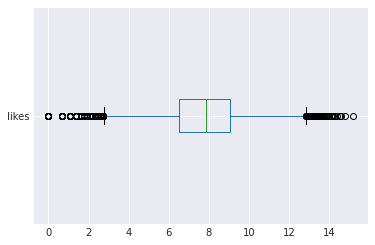

In [22]:
sns.set_style('darkgrid')
df['likes'].plot(kind='box',vert=False)

Text(0.5, 1.0, 'VIEWS distribution')

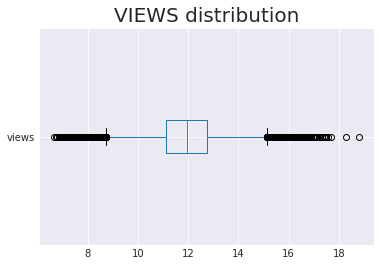

Text(0.5, 1.0, 'DISLIKES distribution')

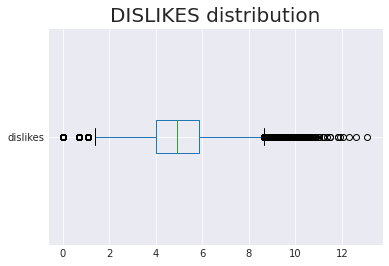

Text(0.5, 1.0, 'COMMENT_COUNT distribution')

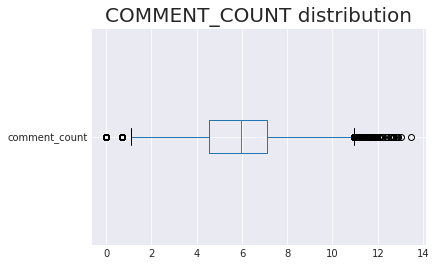

In [28]:
for i in num_cols:
  df[i].plot(kind='box',vert=False)
  plt.title(f'{i.upper()} distribution',fontsize=20)
  plt.show()

**4. Split the processed dataset back into train and test datasets.**

The first train.shape[0] of df are rows that belong to train and the rest are those that belong to test

In [45]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [46]:
features

['title',
 'channel_title',
 'publish_date',
 'tags',
 'views',
 'dislikes',
 'comment_count',
 'description',
 'category_id_1.0',
 'category_id_2.0',
 'category_id_10.0',
 'category_id_15.0',
 'category_id_17.0',
 'category_id_19.0',
 'category_id_20.0',
 'category_id_22.0',
 'category_id_23.0',
 'category_id_24.0',
 'category_id_25.0',
 'category_id_26.0',
 'category_id_27.0',
 'category_id_28.0',
 'category_id_29.0',
 'category_id_30.0',
 'category_id_43.0',
 'country_code_CA',
 'country_code_GB',
 'country_code_IN',
 'country_code_US']

**5. Split the train set into train and validation sets.**

We will use 80-20 split with 80% of the rows belonging to training data. Stratified Sampling is necessary, since the dataset is highly imbalanced. Stratified sampling ensures that the minority class is distributed proportionally among the two classes.

In [47]:
trn,val = train_test_split(train_proc,test_size=0.20,random_state=42)

In [49]:
###### Input to our model will be the features
X_trn, X_val = trn[features], val[features]

###### Output of our model will be the TARGET_COL
y_trn, y_val = trn[TARGET_COL], val[TARGET_COL]

##### Features for the test data that we will be predicting
X_test = test_proc[features]

In [50]:
X_trn.shape,X_val.shape,y_trn.shape,y_val.shape

((20848, 29), (5213, 29), (20848,), (5213,))

**6. Fit a regression Model on train, check its results on validation set.**

In [35]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

**Only Numerical Columns**

In [37]:
clf = LinearRegression()

_ = clf.fit(X_trn[num_cols], y_trn)

preds_val = clf.predict(X_val[num_cols])

av_metric_score = av_metric(y_val, preds_val)
RMLSE = rmsle(y_val, preds_val)
print(f'RMLSE score is: {RMLSE}')
print(f'AV metric score is: {av_metric_score}')

RMLSE score is: 0.1323510392987396
AV metric score is: 922.6909230414184


In [38]:
preds_test = clf.predict(X_test[num_cols])

preds_test = np.expm1(preds_test)

download_preds(preds_test, 'lr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
pd.read_csv('lr.csv').head()

video_id        likes
0     87185   694.072378
1      9431  2684.382868
2     40599    60.155838
3       494  2052.848608
4     73942  1594.217447

**Numerical Columns + Categorical Columns**

In [51]:
X_trn.columns

Index(['title', 'channel_title', 'publish_date', 'tags', 'views', 'dislikes',
       'comment_count', 'description', 'category_id_1.0', 'category_id_2.0',
       'category_id_10.0', 'category_id_15.0', 'category_id_17.0',
       'category_id_19.0', 'category_id_20.0', 'category_id_22.0',
       'category_id_23.0', 'category_id_24.0', 'category_id_25.0',
       'category_id_26.0', 'category_id_27.0', 'category_id_28.0',
       'category_id_29.0', 'category_id_30.0', 'category_id_43.0',
       'country_code_CA', 'country_code_GB', 'country_code_IN',
       'country_code_US'],
      dtype='object')

In [52]:
features = [c for c in X_trn.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in text_cols + date_cols]

In [56]:
cat_num_cols 

['views',
 'dislikes',
 'comment_count',
 'category_id_1.0',
 'category_id_2.0',
 'category_id_10.0',
 'category_id_15.0',
 'category_id_17.0',
 'category_id_19.0',
 'category_id_20.0',
 'category_id_22.0',
 'category_id_23.0',
 'category_id_24.0',
 'category_id_25.0',
 'category_id_26.0',
 'category_id_27.0',
 'category_id_28.0',
 'category_id_29.0',
 'category_id_30.0',
 'category_id_43.0',
 'country_code_CA',
 'country_code_GB',
 'country_code_IN',
 'country_code_US']

In [53]:
clf = LinearRegression()

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 852.2361389674729


In [54]:
preds_test = clf.predict(X_test[cat_num_cols])

preds_test = np.expm1(preds_test)

download_preds(preds_test, 'lr_num_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
pd.read_csv('lr_num_cat.csv').head()

video_id        likes
0     87185   617.694812
1      9431  2244.450303
2     40599    59.658709
3       494  3957.863421
4     73942  1428.764339

**DecisionTreeRegressor**

In [57]:
clf = DecisionTreeRegressor(random_state=2)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 916.6432863422627


# **Hyperparameter Tuning**

In our decision tree model earlier, we did not change any of the parameters that were input to our model. However hyper-parameters and their values vary from dataset to dataset, and their optimal values have a large impact on the performance of our model.

To perform hyperparameter-tuning we specify a list of hyper-parameters to tune and their possible values.

For example:
```
max_depth: [6, 9, 12, 15]
learning_rate: [0.0001, 0.005, 0.01, 0.05]
```

etc.

## **1. Grid Search**

In grid search we try all possible combinations from the values of hyperparameters provided, to find the optimal hyper-parameter combination. However as the number of hyperparameters and their possible values grows, doing a grid search becomes infeasible.

Consider there are 5 hyperparameters to tune, and each of them 5 have different possible values.

Then total possible combinations of hyperparameters will be:

5 x 5 x 5 x 5 x 5 = 3125.

So you will have to wait for your model to run 3125 times, before getting the optimal set of hyperparameters.

If you still think you want to run it these many times, you are most welcome :)


# **2. Random Search**

In random search we will run our model only a fixed number of times, say 10, and among these 10 runs we will return the best hyper-parameter combination. Yes, you are right, this may not be the optimal hyper-parameter combination. But, it saves much more time, so we will go for random search.

In [62]:
from sklearn.model_selection import RandomizedSearchCV
hyperparam_combs = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 10, 20, 30, 40],
    'max_features': [0.2, 0.4, 0.6, 0.8, 1],
    'max_leaf_nodes': [8, 16, 32, 64, 128,256,512],
}

clf = RandomizedSearchCV(DecisionTreeRegressor(),
                         hyperparam_combs,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

{'max_depth': 12,
 'max_features': 0.6,
 'max_leaf_nodes': 256,
 'min_samples_split': 20}

In [63]:
clf = DecisionTreeRegressor(**search.best_params_)

_ = clf.fit(X_trn[cat_num_cols], y_trn)

preds_val = clf.predict(X_val[cat_num_cols])

av_metric_score = av_metric(y_val, preds_val)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 747.8477672636105


In [64]:
preds_test = clf.predict(X_test[cat_num_cols])

preds_test = np.expm1(preds_test)

download_preds(preds_test, 'dt_num_cat.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
pd.read_csv('dt_num_cat.csv').head()

video_id        likes
0     87185   819.912960
1      9431  2178.638623
2     40599   102.619576
3       494  3895.623659
4     73942  1414.703195

# **Validation Strategy.**

**Problems with simple train_test_split validation**

* We are not using complete 100 % of the dataset for training. More data implies more performance, if the data quality is good.

* We are not using complete 100 % of the dataset for validation. Our validation now is biased towards the validation set we have got through train_test_split. What if the test set is different from the validation set ?


K Fold validation splits the dataset into K-parts or K-splits.

Suppose we are performing a 5-fold validation. Thus we split the training dataset into 5 parts. Each of these will contain 20 % of the dataset.


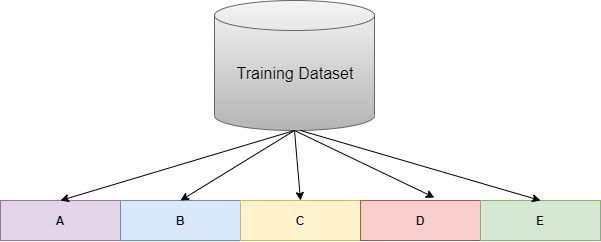

Now for each of these parts, we take them as validation one by one and rest of the parts for training. The unshaded or white box, represents the part among A, B, C, D, and E, that we take for validation. Rest are used for training in that particular fold.
Then we make two predictions (shown in the right hand side of the diagram):

**1. Predictions for the validation set:** This is also known as out-of-fold prediction.

**2. Predictions for the test set:** This is the dataset for which we need to submit our predictions to AV.

Finally if we combine the predictions for each of these folds we get OOFs or Out-of-Folds predictions. This is the prediction for the entire dataset. We can now see the performance our classifier on the entire training set.

Also we take the mean of the test predictions for each fold, and get our final test_predictions. We then need to round it to 0 or 1, since our metric demands we submit a discrete output, ie. no probabilities. 

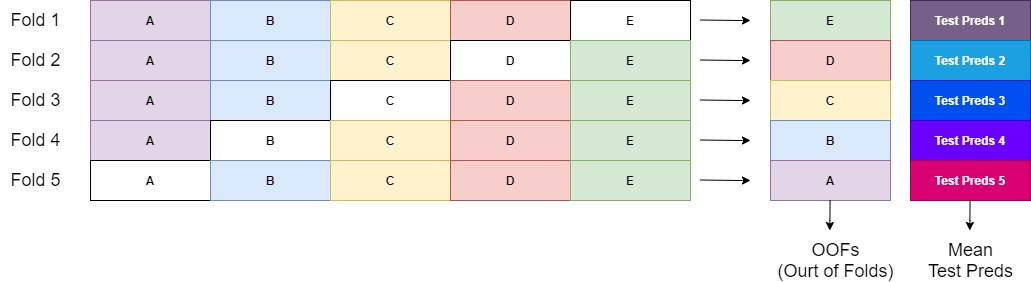

## **Stratified K-Fold.**

One obvious problem with normal KFold, is that each in each fold the distribution of samples in the validation set, will be not be same. This is a big problem with imbalanced datasets. 

In our above example its possible that in any of the splits we could have could have a validation set having all samples with less number of likes

To overcome this problem we will use Stratified-KFold Validation. StratifiedKFold ensures that each of the splits have same proportion of examples of each type


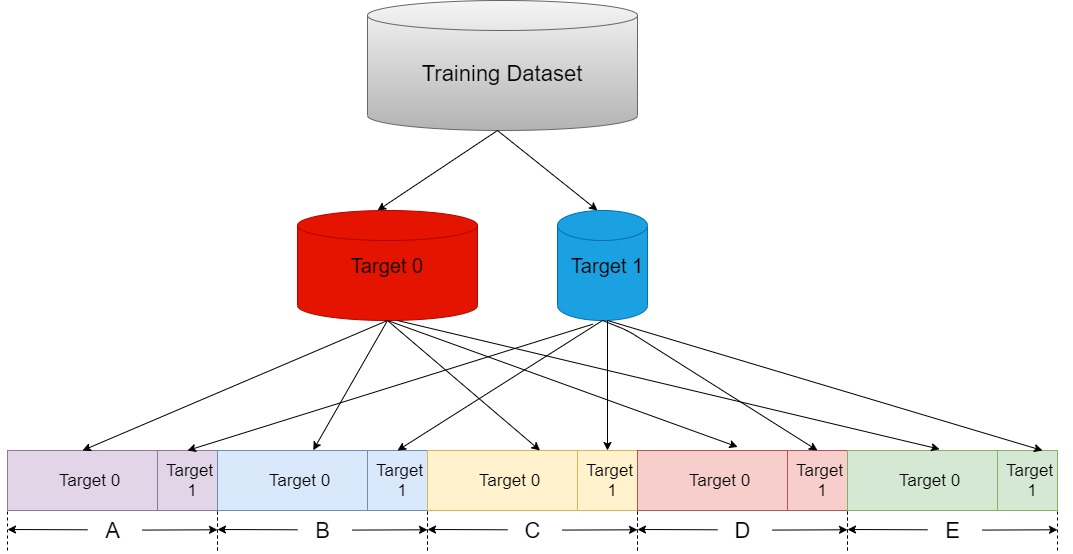

Lets make our Decision Tree Model with Stratified KFold Validation

**Function to Run StratifiedKFold**

In [68]:
pd.qcut(np.arange(10), 5, labels = False, duplicates='drop')

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])

In [69]:
 pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

0        4
1        5
2        2
3        9
4        5
        ..
26056    7
26057    3
26058    9
26059    6
26060    4
Name: likes, Length: 26061, dtype: int64

In [70]:
from sklearn.model_selection import StratifiedKFold
def run_clf_kfold(clf, train, test, features):

  N_SPLITS = 5

  oofs = np.zeros(len(train))
  preds = np.zeros((len(test)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ############# Get train, validation and test sets along with targets ################
  
    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    ############# Scaling Data ################
    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)


    ############# Fitting and Predicting ################

    _ = clf.fit(X_trn, y_trn)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS #calculate 


  oofs_score = av_metric(target, oofs) ## out of folds
  print(f'\n\nAV metric for oofs is {oofs_score}')

  return oofs, preds

**KFold on Decision Tree**

In [71]:
clf = DecisionTreeRegressor(**search.best_params_)
dt_oofs, dt_preds = run_clf_kfold(clf, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 765.947176089877

------------- Fold 2 -------------

AV metric score for validation set is 746.6514583836909

------------- Fold 3 -------------

AV metric score for validation set is 758.459910012022

------------- Fold 4 -------------

AV metric score for validation set is 757.5818743361863

------------- Fold 5 -------------

AV metric score for validation set is 756.5807640392323


AV metric for oofs is 757.0696473816331


In [72]:
dt_preds

array([6.49600917, 7.89241577, 4.31849638, ..., 8.8191542 , 9.47226319,
       8.49310601])

In [74]:
np.expm1(dt_preds)

array([  661.4924534 ,  2675.90289168,    74.0756584 , ...,
        6761.54246564, 12993.26251227,  4880.00300004])

In [75]:
dt_preds_t = np.expm1(dt_preds)
download_preds(dt_preds_t, file_name = 'hacklive_dt_5_folds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Leaderboard Scores 	689.4655101757**

# **Gradient Boosting**

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

https://en.wikipedia.org/wiki/Gradient_boosting

https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/

Most Popular Variants of GradientBoosting
----------------------------

1. LightGBM

2. XGBoost

3. CatBoost

 ## **LightGBM**

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.

* Lower memory usage.

* Better accuracy.

* Support of parallel and GPU learning.

* Capable of handling large-scale data.

https://lightgbm.readthedocs.io/en/latest/

In [76]:
from lightgbm import LGBMRegressor
clf = LGBMRegressor(random_state=42)
lgb_oofs, lgb_preds = run_clf_kfold(clf, train_proc, test_proc, cat_num_cols)


------------- Fold 1 -------------

AV metric score for validation set is 674.7737515393275

------------- Fold 2 -------------

AV metric score for validation set is 678.3212622895253

------------- Fold 3 -------------

AV metric score for validation set is 669.5119539218649

------------- Fold 4 -------------

AV metric score for validation set is 665.6236530707358

------------- Fold 5 -------------

AV metric score for validation set is 671.8950668383243


AV metric for oofs is 672.0393057033824


In [77]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_5_folds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Leaderboard Scores :656.0607090483381**

### **Tuning LightGBM**

* Early Stopping: Stopping the model training, when the model starts to overfit
  * How do we know if model is overfitting ?
* HyperParameter Optimization.
  * Is random search the best way to go ?

In [78]:
def run_gradient_boosting(clf, fit_params, train, test, features):
  N_SPLITS = 5
  oofs = np.zeros(len(train_proc))
  preds = np.zeros((len(test_proc)))

  target = train[TARGET_COL]

  folds = StratifiedKFold(n_splits = N_SPLITS)
  stratified_target = pd.qcut(train[TARGET_COL], 10, labels = False, duplicates='drop')

  feature_importances = pd.DataFrame()

  for fold_, (trn_idx, val_idx) in enumerate(folds.split(train, stratified_target)):
    print(f'\n------------- Fold {fold_ + 1} -------------')

    ### Training Set
    X_trn, y_trn = train[features].iloc[trn_idx], target.iloc[trn_idx]

    ### Validation Set
    X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]

    ### Test Set
    X_test = test[features]

    scaler = StandardScaler()
    _ = scaler.fit(X_trn)

    X_trn = scaler.transform(X_trn)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    _ = clf.fit(X_trn, y_trn, eval_set = [(X_val, y_val)], **fit_params)

    fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': clf.feature_importances_})
    feature_importances = pd.concat([feature_importances, fold_importance], axis=0)

    ### Instead of directly predicting the classes we will obtain the probability of positive class.
    preds_val = clf.predict(X_val)
    preds_test = clf.predict(X_test)

    fold_score = av_metric(y_val, preds_val)
    print(f'\nAV metric score for validation set is {fold_score}')

    oofs[val_idx] = preds_val
    preds += preds_test / N_SPLITS


  oofs_score = av_metric(target, oofs)
  print(f'\n\nAV metric for oofs is {oofs_score}')

  feature_importances = feature_importances.reset_index(drop = True)
  fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
  fi.plot(kind = 'barh', figsize=(12, 6))

  return oofs, preds, fi




------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.688058
[200]	valid_0's rmse: 0.673056
[300]	valid_0's rmse: 0.668448
[400]	valid_0's rmse: 0.666901
[500]	valid_0's rmse: 0.666187
[600]	valid_0's rmse: 0.666155
[700]	valid_0's rmse: 0.665891
[800]	valid_0's rmse: 0.666161
Early stopping, best iteration is:
[733]	valid_0's rmse: 0.665611

AV metric score for validation set is 665.6109435506439

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.689594
[200]	valid_0's rmse: 0.676902
[300]	valid_0's rmse: 0.673678
[400]	valid_0's rmse: 0.672131
[500]	valid_0's rmse: 0.672627
Early stopping, best iteration is:
[406]	valid_0's rmse: 0.672039

AV metric score for validation set is 672.0387821770701

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.684084
[200]	valid_0's rmse: 0

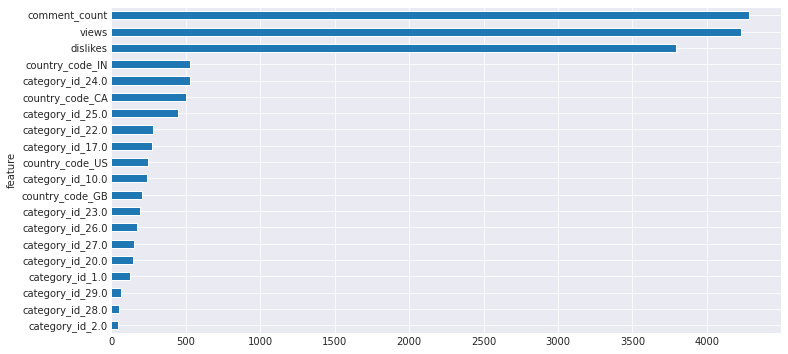

In [79]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.76,
                        metric = 'None',
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

**Tune Hyperparameters**

In [ ]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_5_folds_tuned.csv')

In [81]:
params = {"n_estimators":[1000,1500,2000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.76,0.80,0.85],
          "random_state":[1,15,42]}
clf = RandomizedSearchCV(LGBMRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'random_state': 42}


------------- Fold 1 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.688108
[200]	valid_0's rmse: 0.673614
[300]	valid_0's rmse: 0.668514
[400]	valid_0's rmse: 0.666163
[500]	valid_0's rmse: 0.665282
[600]	valid_0's rmse: 0.665275
Early stopping, best iteration is:
[538]	valid_0's rmse: 0.66502

AV metric score for validation set is 665.0203372284973

------------- Fold 2 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.690527
[200]	valid_0's rmse: 0.677791
[300]	valid_0's rmse: 0.674205
[400]	valid_0's rmse: 0.673342
[500]	valid_0's rmse: 0.672534
[600]	valid_0's rmse: 0.672393
[700]	valid_0's rmse: 0.672391
Early stopping, best iteration is:
[674]	valid_0's rmse: 0.672056

AV metric score for validation set is 672.056379994552

------------- Fold 3 -------------
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 0.683826
[200]	valid_0's rmse: 0.6

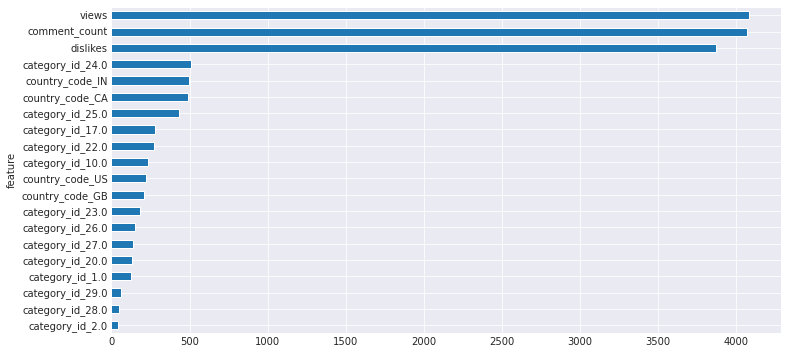

In [82]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.8,
                        metric = 'None',random_state=42
                        )
fit_params = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [83]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_5_folds_tuned2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 648.3639827926427.**


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.668514
[600]	valid_0's rmse: 0.665275
Early stopping, best iteration is:
[538]	valid_0's rmse: 0.66502

AV metric score for validation set is 665.0203372284973

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.674205
[600]	valid_0's rmse: 0.672393
Early stopping, best iteration is:
[674]	valid_0's rmse: 0.672056

AV metric score for validation set is 672.056379994552

------------- Fold 3 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.666885
Early stopping, best iteration is:
[347]	valid_0's rmse: 0.666739

AV metric score for validation set is 666.7385751935659

------------- Fold 4 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's rmse: 0.662775
[600]	valid_0's rmse: 0.660724
Early stopping, best

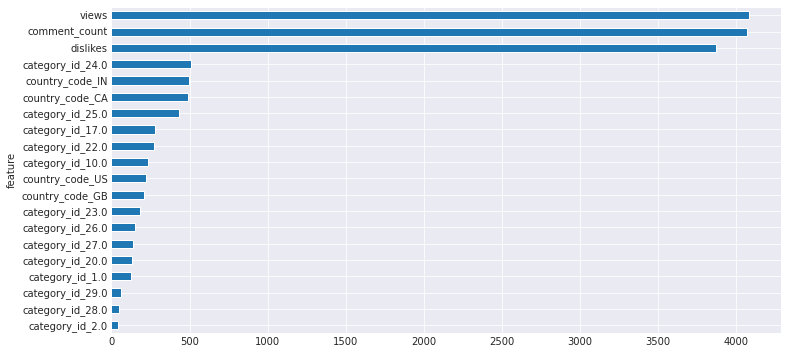

In [84]:
clf = LGBMRegressor(n_estimators = 1000,
                        learning_rate = 0.05,
                        colsample_bytree = 0.8,
                        metric = 'None',random_state=42
                        )
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [85]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_5_folds_tuned3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 648.3639827926427.**

## **CatBoost**

CatBoost is a high-performance open source library for gradient boosting on decision trees.

Features

* Great quality without parameter tuning: Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters

* Categorical features support: Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers.

* Fast and scalable GPU version: Train your model on a fast implementation of gradient-boosting algorithm for GPU. Use a multi-card configuration for large datasets.

* Improved accuracy: Reduce overfitting when constructing your models with a novel gradient-boosting scheme.

* Fast prediction: Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier

https://catboost.ai/

**Hyperparameter Tuning to find best parameters for catboostregressor**

In [86]:
params = {"n_estimators":[1000,1500,2000,3000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "rsm":[0.4,0.5,0.76,0.80,0.85],
          "random_state":[1,15,42,2054]}
clf = RandomizedSearchCV(CatBoostRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

Streaming output truncated to the last 5000 lines.
1001:	learn: 0.6768581	total: 4.87s	remaining: 2.42s
1002:	learn: 0.6768102	total: 4.88s	remaining: 2.42s
1003:	learn: 0.6767503	total: 4.88s	remaining: 2.41s
1004:	learn: 0.6766955	total: 4.89s	remaining: 2.41s
1005:	learn: 0.6766589	total: 4.89s	remaining: 2.4s
1006:	learn: 0.6766210	total: 4.89s	remaining: 2.4s
1007:	learn: 0.6765695	total: 4.9s	remaining: 2.39s
1008:	learn: 0.6765073	total: 4.9s	remaining: 2.39s
1009:	learn: 0.6764286	total: 4.91s	remaining: 2.38s
1010:	learn: 0.6763822	total: 4.91s	remaining: 2.38s
1011:	learn: 0.6763026	total: 4.92s	remaining: 2.37s
1012:	learn: 0.6762286	total: 4.92s	remaining: 2.37s
1013:	learn: 0.6761631	total: 4.93s	remaining: 2.36s
1014:	learn: 0.6761267	total: 4.94s	remaining: 2.36s
1015:	learn: 0.6760812	total: 4.94s	remaining: 2.35s
1016:	learn: 0.6760207	total: 4.95s	remaining: 2.35s
1017:	learn: 0.6759563	total: 4.95s	remaining: 2.34s
1018:	learn: 0.6758967	total: 4.95s	remaining: 2.34s

{'learning_rate': 0.05, 'n_estimators': 1500, 'random_state': 15, 'rsm': 0.5}


------------- Fold 1 -------------
0:	learn: 1.8651563	test: 1.8569330	best: 1.8569330 (0)	total: 4.94ms	remaining: 7.4s
200:	learn: 0.6814359	test: 0.6969521	best: 0.6969521 (200)	total: 859ms	remaining: 5.55s
400:	learn: 0.6499338	test: 0.6719426	best: 0.6719426 (400)	total: 1.73s	remaining: 4.75s
600:	learn: 0.6343176	test: 0.6642991	best: 0.6642906 (599)	total: 2.59s	remaining: 3.87s
800:	learn: 0.6227177	test: 0.6603441	best: 0.6603354 (798)	total: 3.46s	remaining: 3.02s
1000:	learn: 0.6123608	test: 0.6585560	best: 0.6585409 (998)	total: 4.34s	remaining: 2.16s
1200:	learn: 0.6035415	test: 0.6572841	best: 0.6572841 (1200)	total: 5.22s	remaining: 1.3s
1400:	learn: 0.5949501	test: 0.6565159	best: 0.6564818 (1396)	total: 6.08s	remaining: 429ms
1499:	learn: 0.5915423	test: 0.6565229	best: 0.6564361 (1478)	total: 6.5s	remaining: 0us

bestTest = 0.6564360744
bestIteration = 1478

Shrink model to first 1479 iterations.

AV metric score for validation set is 656.4360793851856

-----------

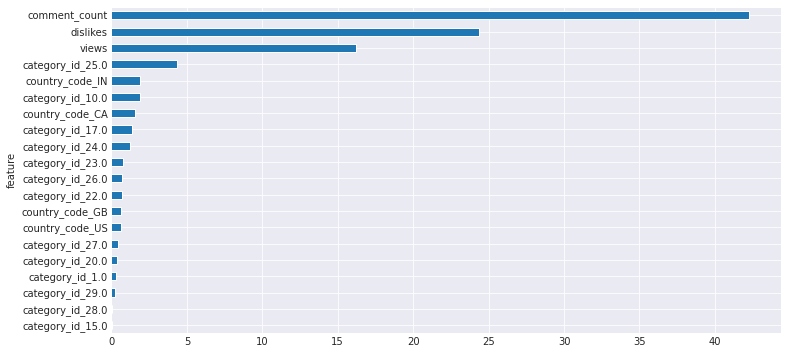

In [87]:
clf = CatBoostRegressor(n_estimators = 1500,
                       learning_rate = 0.05,
                       rsm = 0.5, ## Analogous to colsample_bytree
                       random_state=15,
                       )

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

cb_oofs, cb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [88]:
cb_preds_t = np.expm1(cb_preds)
download_preds(cb_preds_t, file_name = 'hacklive_cb_folds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 644.3809507874872.**

In [89]:
pd.read_csv('hacklive_cb_folds.csv').head()

video_id        likes
0     87185   635.826176
1      9431  2222.072694
2     40599    61.560568
3       494  3717.279094
4     73942  1035.366421

**CatBoost: gives Visible Improvement.**

* Is catboost better then LightGBM ?
* Can catboost score be further improved ?
* Can LighGBM be tuned to give a better score than CatBoost ?

## **XGBoost**

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

https://xgboost.readthedocs.io/en/latest/

In [90]:
params = {"n_estimators":[1000,1500,2000,3000],
          "max_depth":[3,5,6,8,10],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.4,0.5,0.76,0.80,0.85],
          "random_state":[1,15,42,1452,2054]}
clf = RandomizedSearchCV(XGBRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

[07:51:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:51:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 3000,
 'random_state': 15}


------------- Fold 1 -------------
[09:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.43283
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:1.2186
[400]	validation_0-rmse:0.680826
[600]	validation_0-rmse:0.663868
[800]	validation_0-rmse:0.662538
[1000]	validation_0-rmse:0.661967
[1200]	validation_0-rmse:0.662135
Stopping. Best iteration:
[1018]	validation_0-rmse:0.66192


AV metric score for validation set is 661.9202763718259

------------- Fold 2 -------------
[09:28:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.42023
Will train until validation_0-rmse hasn't improved in 200 rounds.
[200]	validation_0-rmse:1.21455
[400]	validation_0-rmse:0.688372
[600]	validation_0-rmse:0.673387
[800]	validation_0-rmse:0.672123
[1000]	validation_0-rmse:0.672014
St

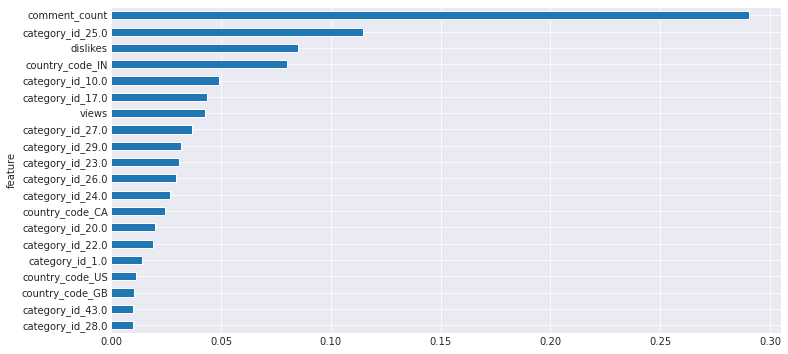

In [91]:
clf = XGBRegressor(**search.best_params_)

fit_params = {'verbose': 200, 'early_stopping_rounds': 200}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [92]:
xgb_preds_t = np.expm1(xgb_preds)
download_preds(xgb_preds_t, file_name = 'hacklive_xgb_5_folds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 646.9132306858093.**

**Questions to think about XGBoost**

* Is XGBoost worse than LightGBM and CatBoost ?

* Can XGBoost be tuned more ?


# **Feature Engineering**

* What does a model know about a sample ?

* What the model does not know about the sample ?

* How do we provide that unknown information to the model ?


***Feature Engineering is one of the biggest difference maker in any ML competition.*** 

<br>
<br>

**Helper Functions**

In [94]:
def join_df(train, test):

  df = pd.concat([train, test], axis=0).reset_index(drop = True)
  features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
  df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))

  return df, features

def split_df_and_get_features(df, train_nrows):

  train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
  features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
  
  return train, test, features

In [95]:
df, features = join_df(train, test)

In [96]:
cat_cols = ['category_id', 'country_code', 'channel_title']

In [98]:
pd.factorize(df['category_id'])[0]

array([ 0,  0,  0, ...,  0, 12,  0])

In [101]:
pd.factorize(df['category_id'])[1]

Float64Index([24.0, 10.0, 23.0,  1.0, 25.0, 22.0, 26.0, 17.0, 27.0, 29.0, 20.0,
              28.0, 43.0, 15.0,  2.0, 19.0, 30.0],
             dtype='float64')

In [102]:
### Label Encoding
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [103]:
df.head(3)

video_id  ...     likes
0     53364  ...  7.763021
1     51040  ...  8.091015
2      1856  ...  6.364751

[3 rows x 12 columns]

**DATE TIME FEATURES**

In [104]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')
df['publish_date_days_since_start'] = (df['publish_date'] - df['publish_date'].min()).dt.days

df['publish_date_day_of_week'] = df['publish_date'].dt.dayofweek
df['publish_date_year'] = df['publish_date'].dt.year
df['publish_date_month'] = df['publish_date'].dt.month

In [105]:
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [106]:
features

['title',
 'channel_title',
 'category_id',
 'publish_date',
 'tags',
 'views',
 'dislikes',
 'comment_count',
 'description',
 'country_code',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month']

In [107]:
cat_cols

['category_id', 'country_code', 'channel_title']

In [108]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month']

In [109]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])

# Hyperparameter tuning

In [110]:
params = {"n_estimators":[1000,1500,2000,5000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.65,0.76,0.80,0.85],
          "random_state":[1,15,42]}
clf = RandomizedSearchCV(LGBMRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

{'colsample_bytree': 0.76,
 'learning_rate': 0.05,
 'n_estimators': 2000,
 'random_state': 1}

In [111]:
params = {'colsample_bytree': 0.76,
 'learning_rate': 0.05,
 'n_estimators': 2000,
 'random_state': 1}


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.393726	valid_0's rmse: 0.627476
[600]	valid_0's l2: 0.370305	valid_0's rmse: 0.608527
[900]	valid_0's l2: 0.360476	valid_0's rmse: 0.600396
[1200]	valid_0's l2: 0.354727	valid_0's rmse: 0.59559
[1500]	valid_0's l2: 0.350352	valid_0's rmse: 0.591906
[1800]	valid_0's l2: 0.347536	valid_0's rmse: 0.589522
Did not meet early stopping. Best iteration is:
[1993]	valid_0's l2: 0.346374	valid_0's rmse: 0.588535

AV metric score for validation set is 588.5354124228685

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.408227	valid_0's rmse: 0.638927
[600]	valid_0's l2: 0.383628	valid_0's rmse: 0.619377
[900]	valid_0's l2: 0.375166	valid_0's rmse: 0.612508
[1200]	valid_0's l2: 0.370256	valid_0's rmse: 0.608487
[1500]	valid_0's l2: 0.36677	valid_0's rmse: 0.605615
[1800]	valid_0's l2: 0.365911	valid_0's rmse:

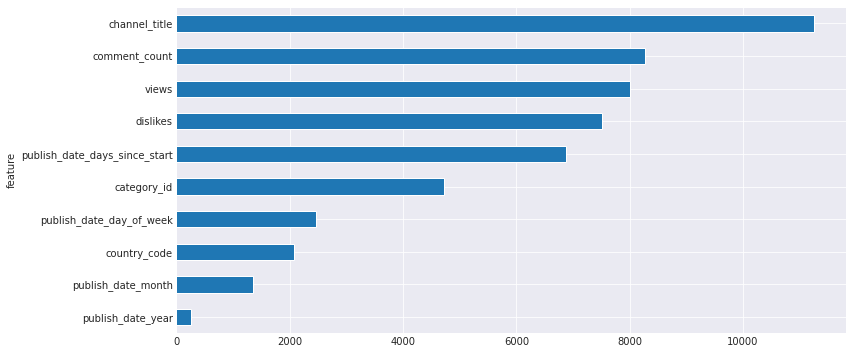

In [112]:
clf = LGBMRegressor(**params)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [113]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_fe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 567.1671541285255.**

In [114]:
pd.read_csv('hacklive_lgb_fe.csv').head()

video_id        likes
0     87185   558.967040
1      9431  1866.198888
2     40599    40.019214
3       494  3951.992389
4     73942   680.324305

## **Frequency Features**

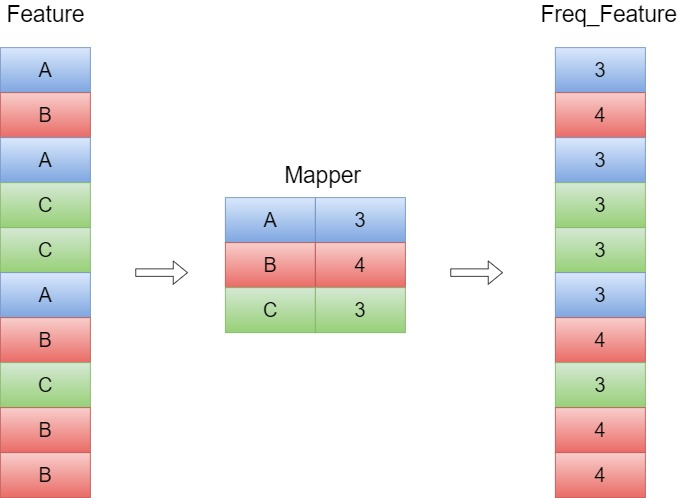

In [115]:
df['channel_title'].value_counts()

116     233
299     180
15      179
92      169
406     152
       ... 
3832      1
5883      1
5551      1
1453      1
4078      1
Name: channel_title, Length: 6979, dtype: int64

In [116]:
df['publish_date'].value_counts()

2018-01-29    282
2017-12-13    258
2018-01-19    257
2017-12-20    255
2018-01-12    255
             ... 
2017-10-27      1
2013-10-27      1
2015-03-29      1
2011-02-03      1
2013-03-20      1
Name: publish_date, Length: 399, dtype: int64

In [117]:
df['channel_title_num_videos'] = df['channel_title'].map(df['channel_title'].value_counts())
df['publish_date_num_videos'] = df['publish_date'].map(df['publish_date'].value_counts())

In [118]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [119]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'publish_date_days_since_start',
 'publish_date_day_of_week',
 'publish_date_year',
 'publish_date_month',
 'channel_title_num_videos',
 'publish_date_num_videos']

In [120]:
params = {"n_estimators":[1000,1500,2000,5000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.65,0.76,0.80,0.85],
          "random_state":[1,15,42]}
clf = RandomizedSearchCV(LGBMRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

{'colsample_bytree': 0.85,
 'learning_rate': 0.05,
 'n_estimators': 5000,
 'random_state': 1}

In [121]:
parms = {'colsample_bytree': 0.85,
 'learning_rate': 0.05,
 'n_estimators': 5000,
 'random_state': 1}


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.377513	valid_0's rmse: 0.614421
[600]	valid_0's l2: 0.344597	valid_0's rmse: 0.587024
[900]	valid_0's l2: 0.332288	valid_0's rmse: 0.576444
[1200]	valid_0's l2: 0.32346	valid_0's rmse: 0.568736
[1500]	valid_0's l2: 0.319427	valid_0's rmse: 0.565178
[1800]	valid_0's l2: 0.317313	valid_0's rmse: 0.563305
[2100]	valid_0's l2: 0.314245	valid_0's rmse: 0.560576
[2400]	valid_0's l2: 0.313201	valid_0's rmse: 0.559643
[2700]	valid_0's l2: 0.313008	valid_0's rmse: 0.559471
[3000]	valid_0's l2: 0.312488	valid_0's rmse: 0.559006
[3300]	valid_0's l2: 0.312447	valid_0's rmse: 0.55897
Early stopping, best iteration is:
[3141]	valid_0's l2: 0.312317	valid_0's rmse: 0.558853

AV metric score for validation set is 558.8532497403198

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.378391	valid_0's rmse: 0.615135
[

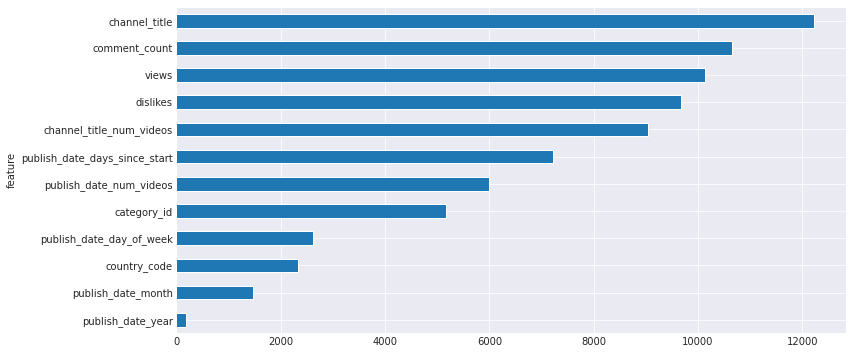

In [122]:
clf = LGBMRegressor(**parms)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [123]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_fe_num_videos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 538.0328029478384.**

In [124]:
pd.read_csv('hacklive_lgb_fe_num_videos.csv').head()

video_id        likes
0     87185   746.177506
1      9431  1913.591697
2     40599    30.265205
3       494  4125.531587
4     73942   644.984959

**Feature Engineering for Text Data**

**Length of Text Columns**

In [125]:
df['title_len'] = df['title'].apply(lambda x: len(x))
df['description_len'] = df['description'].apply(lambda x: len(x))
df['tags_len'] = df['tags'].apply(lambda x: len(x))

In [126]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [127]:
params = {"n_estimators":[1000,1500,2000,5000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.65,0.76,0.80,0.85],
          "random_state":[1,15,42]}
clf = RandomizedSearchCV(LGBMRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

{'colsample_bytree': 0.85,
 'learning_rate': 0.05,
 'n_estimators': 5000,
 'random_state': 1}

In [128]:
params = search.best_params_


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.359521	valid_0's rmse: 0.599601
[600]	valid_0's l2: 0.327946	valid_0's rmse: 0.572666
[900]	valid_0's l2: 0.313117	valid_0's rmse: 0.559569
[1200]	valid_0's l2: 0.30617	valid_0's rmse: 0.553326
[1500]	valid_0's l2: 0.301782	valid_0's rmse: 0.549347
[1800]	valid_0's l2: 0.29861	valid_0's rmse: 0.546452
[2100]	valid_0's l2: 0.296963	valid_0's rmse: 0.544943
[2400]	valid_0's l2: 0.296088	valid_0's rmse: 0.54414
[2700]	valid_0's l2: 0.295424	valid_0's rmse: 0.543529
[3000]	valid_0's l2: 0.29489	valid_0's rmse: 0.543038
[3300]	valid_0's l2: 0.294039	valid_0's rmse: 0.542253
[3600]	valid_0's l2: 0.293706	valid_0's rmse: 0.541946
[3900]	valid_0's l2: 0.293514	valid_0's rmse: 0.541769
[4200]	valid_0's l2: 0.293248	valid_0's rmse: 0.541524
[4500]	valid_0's l2: 0.293189	valid_0's rmse: 0.541469
[4800]	valid_0's l2: 0.293055	valid_0's rmse: 0.541345
Did not meet early stopping.

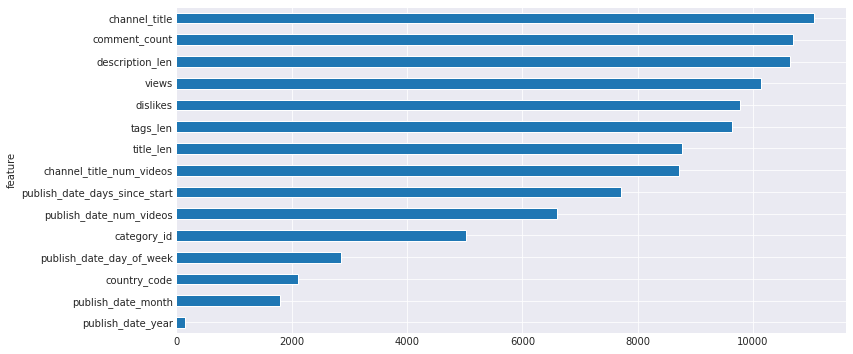

In [129]:
clf = LGBMRegressor(**params)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [130]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_text_cols_len.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 514.8295548175844.**

**Bag of Words Approach for Text Based Features**

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
TOP_N_WORDS = 50

vec = CountVectorizer(max_features = TOP_N_WORDS)
txt_to_fts = vec.fit_transform(df['description']).toarray()
txt_to_fts.shape

(37231, 50)

In [132]:
c = 'description'
txt_fts_names = [c + f'_word_{i}_count' for i in range(TOP_N_WORDS)]
df[txt_fts_names] = txt_to_fts

train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [133]:
params = {"n_estimators":[1000,1500,2000,5000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.65,0.76,0.80,0.85],
          "random_state":[1,15,42]}
clf = RandomizedSearchCV(LGBMRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_

{'colsample_bytree': 0.85,
 'learning_rate': 0.05,
 'n_estimators': 5000,
 'random_state': 1}

In [134]:
params = search.best_params_


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.318272	valid_0's rmse: 0.564156
[600]	valid_0's l2: 0.292619	valid_0's rmse: 0.540943
[900]	valid_0's l2: 0.280919	valid_0's rmse: 0.530018
[1200]	valid_0's l2: 0.275218	valid_0's rmse: 0.524613
[1500]	valid_0's l2: 0.269891	valid_0's rmse: 0.51951
[1800]	valid_0's l2: 0.267678	valid_0's rmse: 0.517376
[2100]	valid_0's l2: 0.265241	valid_0's rmse: 0.515015
[2400]	valid_0's l2: 0.262939	valid_0's rmse: 0.512776
[2700]	valid_0's l2: 0.261541	valid_0's rmse: 0.511411
[3000]	valid_0's l2: 0.261046	valid_0's rmse: 0.510927
[3300]	valid_0's l2: 0.260627	valid_0's rmse: 0.510516
[3600]	valid_0's l2: 0.259889	valid_0's rmse: 0.509793
[3900]	valid_0's l2: 0.259584	valid_0's rmse: 0.509494
[4200]	valid_0's l2: 0.2592	valid_0's rmse: 0.509117
[4500]	valid_0's l2: 0.258974	valid_0's rmse: 0.508895
[4800]	valid_0's l2: 0.258639	valid_0's rmse: 0.508565
Did not meet early stopping

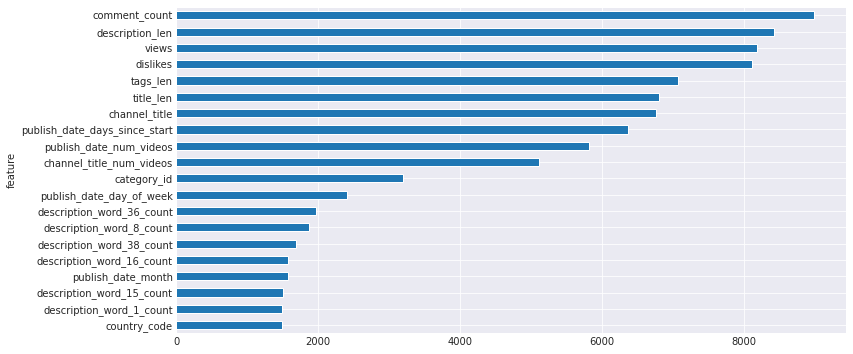

In [135]:
clf = LGBMRegressor(**params)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [136]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_text_cols_bow.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Your score for this submission is : 482.15742459164267.**

**Grouping Features**

In [148]:
df['channel_title_mean_views'] = df.groupby('channel_title')['views'].transform('mean')
df['channel_title_max_views'] = df.groupby('channel_title')['views'].transform('max')
df['channel_title_min_views'] = df.groupby('channel_title')['views'].transform('min')

df['channel_title_mean_comments'] = df.groupby('channel_title')['comment_count'].transform('mean')
df['channel_title_max_comments'] = df.groupby('channel_title')['comment_count'].transform('max')
df['channel_title_min_comments'] = df.groupby('channel_title')['comment_count'].transform('min')

In [149]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.294354	valid_0's rmse: 0.542544
[600]	valid_0's l2: 0.270819	valid_0's rmse: 0.520403
[900]	valid_0's l2: 0.259665	valid_0's rmse: 0.509573
[1200]	valid_0's l2: 0.253028	valid_0's rmse: 0.503019
[1500]	valid_0's l2: 0.250109	valid_0's rmse: 0.500109
[1800]	valid_0's l2: 0.248037	valid_0's rmse: 0.498033
[2100]	valid_0's l2: 0.245912	valid_0's rmse: 0.495895
[2400]	valid_0's l2: 0.24499	valid_0's rmse: 0.494964
[2700]	valid_0's l2: 0.243927	valid_0's rmse: 0.49389
[3000]	valid_0's l2: 0.243375	valid_0's rmse: 0.493331
[3300]	valid_0's l2: 0.24246	valid_0's rmse: 0.492402
[3600]	valid_0's l2: 0.24231	valid_0's rmse: 0.49225
[3900]	valid_0's l2: 0.241908	valid_0's rmse: 0.491842
[4200]	valid_0's l2: 0.241614	valid_0's rmse: 0.491543
[4500]	valid_0's l2: 0.241155	valid_0's rmse: 0.491075
[4800]	valid_0's l2: 0.241049	valid_0's rmse: 0.490967
Did not meet early stopping. 

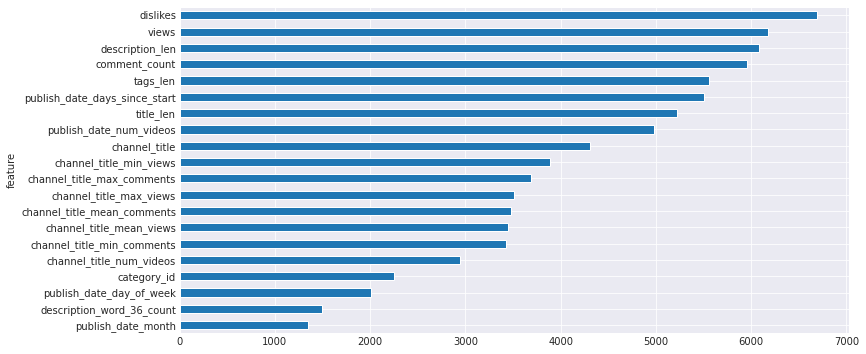

In [150]:
clf = LGBMRegressor(**params)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [140]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds_t, file_name = 'hacklive_lgb_fe_num_videos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Submission Scores :460.009010995894**

**Feature Selection**

* **When is feature selection required ?**
* **Should I focus my time in feature selection or feature engineering?**

In [141]:
fi

feature
publish_date_month               1351.6
description_word_36_count        1495.0
publish_date_day_of_week         2012.0
category_id                      2255.4
channel_title_num_videos         2946.0
channel_title_min_comments       3426.0
channel_title_mean_views         3451.8
channel_title_mean_comments      3474.2
channel_title_max_views          3509.2
channel_title_max_comments       3688.6
channel_title_min_views          3891.0
channel_title                    4306.8
publish_date_num_videos          4981.2
title_len                        5221.2
publish_date_days_since_start    5506.6
tags_len                         5555.6
comment_count                    5957.4
description_len                  6088.4
views                            6174.2
dislikes                         6697.0
Name: importance, dtype: float64

In [163]:
train_proc, test_proc, features = split_df_and_get_features(df, train.shape[0])
features = [c for c in df.columns if c not in [ID_COL, TARGET_COL]]
to_drop_cols = ['views']
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date'] + to_drop_cols]

In [ ]:
params = {"n_estimators":[2000,5000,8000],
          "learning_rate":[0.001,0.01,0.05,0.1],
          "colsample_bytree":[0.65,0.76,0.80,0.85],
          "random_state":[1,15,42]}
clf = RandomizedSearchCV(LGBMRegressor(),
                         params,
                         scoring='neg_root_mean_squared_error',
                         random_state=42,
                         n_iter=20)
# fit on the entire training sample
search = clf.fit(train_proc[cat_num_cols], train_proc[TARGET_COL])

search.best_params_


------------- Fold 1 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.357181	valid_0's rmse: 0.597646
[600]	valid_0's l2: 0.329611	valid_0's rmse: 0.574118
[900]	valid_0's l2: 0.317056	valid_0's rmse: 0.563078
[1200]	valid_0's l2: 0.311199	valid_0's rmse: 0.557853
[1500]	valid_0's l2: 0.307656	valid_0's rmse: 0.554667
[1800]	valid_0's l2: 0.304726	valid_0's rmse: 0.55202
[2100]	valid_0's l2: 0.303132	valid_0's rmse: 0.550574
[2400]	valid_0's l2: 0.302547	valid_0's rmse: 0.550043
Early stopping, best iteration is:
[2320]	valid_0's l2: 0.302303	valid_0's rmse: 0.549821

AV metric score for validation set is 549.821309234173

------------- Fold 2 -------------
Training until validation scores don't improve for 200 rounds.
[300]	valid_0's l2: 0.340505	valid_0's rmse: 0.583528
[600]	valid_0's l2: 0.315412	valid_0's rmse: 0.561616
[900]	valid_0's l2: 0.3068	valid_0's rmse: 0.553896
[1200]	valid_0's l2: 0.300645	valid_0's rmse: 0.548311
[1500

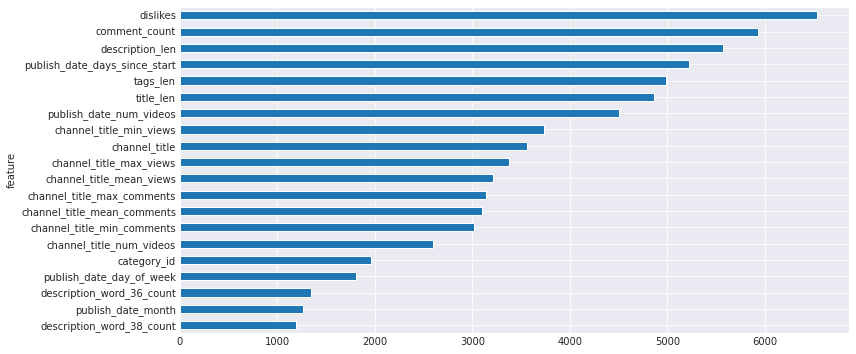

In [143]:
clf = LGBMRegressor(**params)
fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(clf, fit_params, train_proc, test_proc, cat_num_cols)

In [144]:
lgb_preds_t = np.expm1(lgb_preds)
download_preds(lgb_preds, file_name = 'hacklive_lgb_text_cols_bow.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**5870.78957595708	---scores***

# **Ensembling**

In statistics and machine learning, ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.



* What are our best performing algorithms ?
* How do we combine these algorithms to get a better performance ?

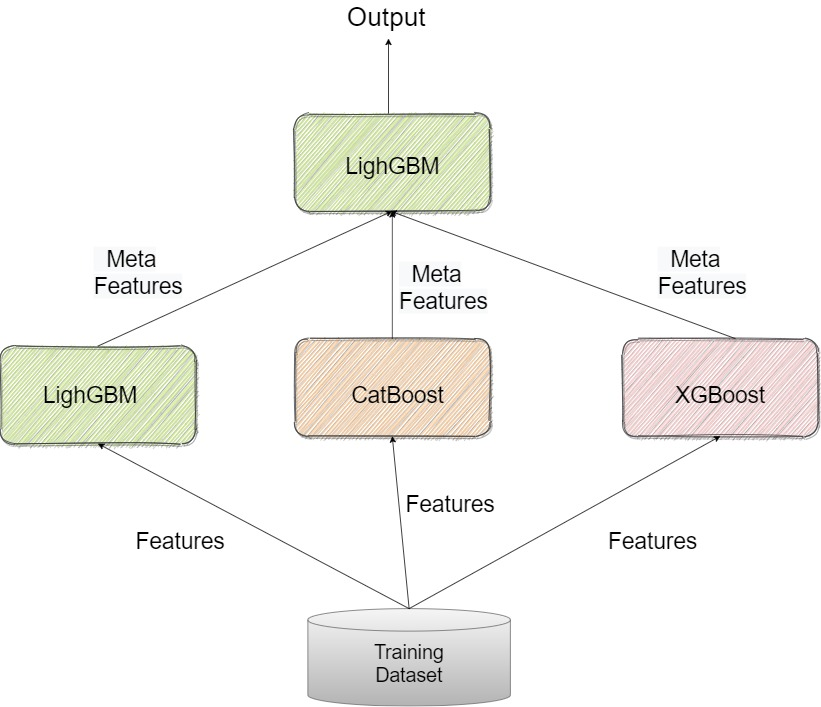

https://courses.analyticsvidhya.com/courses/ensemble-learning-and-ensemble-learning-techniques

In [160]:
 av_metric(np.log1p(train[TARGET_COL]), lgb_oofs * 0.95 + cb_oofs * 0.05)

484.5740061381979

In [152]:
train_new = train[[ID_COL, TARGET_COL]]
train_new[TARGET_COL] = np.log1p(train_new[TARGET_COL])

test_new = test[[ID_COL]]

train_new['lgb'] = lgb_oofs
test_new['lgb'] = lgb_preds

train_new['cb'] = cb_oofs
test_new['cb'] = cb_preds

train_new['xgb'] = xgb_oofs
test_new['xgb'] = xgb_preds

features = [c for c in train_new.columns if c not in [ID_COL, TARGET_COL]]

In [153]:
clf = LinearRegression()

ens_oofs, ens_preds = run_clf_kfold(clf, train_new, test_new, features)


------------- Fold 1 -------------

AV metric score for validation set is 488.78041212947045

------------- Fold 2 -------------

AV metric score for validation set is 486.4065570857187

------------- Fold 3 -------------

AV metric score for validation set is 487.135018133272

------------- Fold 4 -------------

AV metric score for validation set is 473.833969803686

------------- Fold 5 -------------

AV metric score for validation set is 486.7217303020688


AV metric for oofs is 484.60615126451074


In [154]:
ens_preds_t = np.expm1(ens_preds)
download_preds(ens_preds, file_name = 'hacklive_ensemble_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
ens_preds

array([6.61688194, 7.73760312, 3.7112478 , ..., 8.94925363, 8.53620533,
       8.12978746])

In [155]:
ens_preds_t

array([ 746.61036497, 2291.96982549,   39.90481581, ..., 7701.14110156,
       5094.97008801, 3393.07812422])